# IMPORTING LIBRARIES.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# READING GIVEN DATA.

In [2]:
df_matches = pd.read_csv('matches.csv')
df_deliveries = pd.read_csv('deliveries.csv')

# UNDERSTANDING THE GIVEN DATASETS.

**MATCHES DATASET**

In [3]:
df_matches.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
df_matches.shape

(756, 18)

In [6]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
df_matches.isnull().sum().sort_values(ascending=False)

umpire3            637
city                 7
winner               4
player_of_match      4
umpire2              2
umpire1              2
venue                0
win_by_wickets       0
win_by_runs          0
id                   0
season               0
result               0
toss_decision        0
toss_winner          0
team2                0
team1                0
date                 0
dl_applied           0
dtype: int64

In [8]:
(df_matches.isnull().sum()/len(df_matches)*100).sort_values(ascending=False)

umpire3            84.259259
city                0.925926
winner              0.529101
player_of_match     0.529101
umpire2             0.264550
umpire1             0.264550
venue               0.000000
win_by_wickets      0.000000
win_by_runs         0.000000
id                  0.000000
season              0.000000
result              0.000000
toss_decision       0.000000
toss_winner         0.000000
team2               0.000000
team1               0.000000
date                0.000000
dl_applied          0.000000
dtype: float64

In [9]:
df_matches.describe()

id       season  dl_applied  win_by_runs  win_by_wickets
count    756.000000   756.000000  756.000000   756.000000      756.000000
mean    1792.178571  2013.444444    0.025132    13.283069        3.350529
std     3464.478148     3.366895    0.156630    23.471144        3.387963
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.750000  2011.000000    0.000000     0.000000        0.000000
50%      378.500000  2013.000000    0.000000     0.000000        4.000000
75%      567.250000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000

In [10]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Total matches played,venue,teams

In [11]:
print(f"Total Matches Played: {df_matches.id.nunique()}\n\nVenues Played At: Total: {df_matches['city'].nunique()}\
{df_matches['city'].unique()} \
\n\nTeams : Total: {df_matches['team1'].nunique()} {df_matches['team1'].unique()}")

Total Matches Played: 756

Venues Played At: Total: 32['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru'] 

Teams : Total: 15 ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [12]:
df_matches.head(2)

id  season       city        date                team1  \
0   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06       Mumbai Indians   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   

   result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0  normal           0     Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiant            0               7   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   

    umpire2 umpire3  
0  NJ Llong     NaN  
1    S Ravi     NaN

Here we can see that we have id variable which is quite similar to our index so we can drop it and similarly we can see that we have a date column which is similar to season, so we can drop date column. 
Let's drop those variables.

In [13]:
df_matches= df_matches.drop(['id','date'],axis=1)
df_matches.head(1)

season       city                team1                        team2  \
0    2017  Hyderabad  Sunrisers Hyderabad  Royal Challengers Bangalore   

                   toss_winner toss_decision  result  dl_applied  \
0  Royal Challengers Bangalore         field  normal           0   

                winner  win_by_runs  win_by_wickets player_of_match  \
0  Sunrisers Hyderabad           35               0    Yuvraj Singh   

                                       venue      umpire1   umpire2 umpire3  
0  Rajiv Gandhi International Stadium, Uppal  AY Dandekar  NJ Llong     NaN

The immidiate next thing we can see that The variable "venue" is refering same as the variable "city". for example we can say that in the 1st row we can see that the city was "hyderabad" and the venue was "Rajiv Gandhi International Stadium, Uppal".
So as we all know uppal is in eastern hyderabd. so both are indicating same information. So we can drop "venue" varibale to avoid such long string. we can happily go with the variable city.
So let's drop that variable.

In [14]:
df_matches= df_matches.drop('venue',axis=1)
df_matches.head(1)

season       city                team1                        team2  \
0    2017  Hyderabad  Sunrisers Hyderabad  Royal Challengers Bangalore   

                   toss_winner toss_decision  result  dl_applied  \
0  Royal Challengers Bangalore         field  normal           0   

                winner  win_by_runs  win_by_wickets player_of_match  \
0  Sunrisers Hyderabad           35               0    Yuvraj Singh   

       umpire1   umpire2 umpire3  
0  AY Dandekar  NJ Llong     NaN

# NULL VALUES TREATMENT.

Now in the above part we can directly see that there are around 84% null values in the variable "umpire3". So without filling it we can directly drop it.

In [15]:
df_matches = df_matches.drop('umpire3',axis=1)
df_matches.columns

Index(['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'umpire1', 'umpire2'],
      dtype='object')

Let's recheck th null values.

In [16]:
df_matches.isnull().sum().sort_values(ascending=False)

city               7
winner             4
player_of_match    4
umpire1            2
umpire2            2
season             0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
win_by_runs        0
win_by_wickets     0
dtype: int64

Now let's check each and every variables personally which have null values step by step.

In [17]:
df_matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [18]:
# so here we can see that there were many matches played in mumbai city so we can directly fill all the null values with mumbai.
df_matches['city']=df_matches['city'].fillna('Mumbai')

In [19]:
# Now we can see that the value counts of mumbai got increased to 108 from 101 so now all 7 null values got filled with mumbai.
df_matches['city'].value_counts()

Mumbai            108
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [20]:
df_matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [21]:
nan_rows = df_matches[df_matches.isna().any(axis=1)]
nan_rows

season           city                        team1  \
4      2017      Bangalore  Royal Challengers Bangalore   
300    2011          Delhi             Delhi Daredevils   
545    2015      Bangalore  Royal Challengers Bangalore   
570    2015      Bangalore             Delhi Daredevils   
744    2019      Bengaluru  Royal Challengers Bangalore   
753    2019  Visakhapatnam          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
4               Delhi Daredevils  Royal Challengers Bangalore           bat   
300                Pune Warriors             Delhi Daredevils           bat   
545             Rajasthan Royals             Rajasthan Royals         field   
570  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
744             Rajasthan Royals             Rajasthan Royals         field   
753               Delhi Capitals               Delhi Capitals         field   

        result  dl_applied                       winner  win_by_runs  \
4       normal           0  Royal Challengers Bangalore           15   
300  no result           0                          NaN            0   
545  no result           0                          NaN            0   
570  no result           0                          NaN            0   
744  no result           0                          NaN            0   
753     normal           0               Delhi Capitals            0   

     win_by_wickets player_of_match          umpire1       umpire2  
4                 0       KM Jadhav              NaN           NaN  
300               0             NaN        SS Hazare     RJ Tucker  
545               0             NaN        JD Cloete     PG Pathak  
570               0             NaN  HDPK Dharmasena  K Srinivasan  
744               0             NaN      Nigel Llong  Ulhas Gandhe  
753               2         RR Pant              NaN           NaN

In [22]:
# Here we can notice that we have filled the 4 null values with match cancelled.
df_matches['winner']= df_matches['winner'].fillna('match cancelled')
df_matches['player_of_match']= df_matches['player_of_match'].fillna('match cancelled')
df_matches.isnull().sum().sort_values(ascending=False)

umpire1            2
umpire2            2
season             0
city               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
dtype: int64

Now we can see that we have 2 null values in umpire1 and 2 null values in umpire2 variable.
So let's check their value counts and fill them.

In [23]:
df_matches['umpire1'].value_counts()

HDPK Dharmasena          73
Asad Rauf                51
S Ravi                   49
AK Chaudhary             43
Aleem Dar                38
BF Bowden                37
BR Doctrove              34
M Erasmus                32
Nitin Menon              20
RE Koertzen              20
S Asnani                 19
C Shamshuddin            16
JD Cloete                16
CB Gaffaney              14
BG Jerling               13
AY Dandekar              13
KN Ananthapadmanabhan    13
Bruce Oxenford           12
NJ Llong                 12
VA Kulkarni              11
Marais Erasmus           11
A Nand Kishore           11
RK Illingworth           11
SS Hazare                11
K Hariharan              10
S Das                    10
Nigel Llong              10
Anil Chaudhary           10
MR Benson                10
DJ Harper                 9
RM Deshpande              7
BNJ Oxenford              7
IL Howell                 7
GAV Baxter                7
O Nandan                  6
SJ Davis            

In [24]:
df_matches['umpire2'].value_counts()

C Shamshuddin            57
S Ravi                   57
SJA Taufel               54
RJ Tucker                38
CK Nandan                36
RB Tiffin                30
VA Kulkarni              28
SK Tarapore              26
BNJ Oxenford             25
AM Saheba                23
M Erasmus                22
Nitin Menon              22
RE Koertzen              21
DJ Harper                18
AK Chaudhary             15
HDPK Dharmasena          14
NJ Llong                 13
SL Shastri               13
K Srinath                13
K Hariharan              11
Anil Chaudhary           11
S Asnani                 11
CB Gaffaney              10
O Nandan                 10
VK Sharma                 9
Anil Dandekar             9
Yeshwant Barde            9
RK Illingworth            8
PR Reiffel                8
BR Doctrove               8
IL Howell                 7
PG Pathak                 6
A.D Deshmukh              6
Virender Kumar Sharma     6
AL Hill                   6
I Shivram           

In [25]:
df_matches['umpire1'] = df_matches['umpire1'].fillna('HDPK Dharmasena')
df_matches['umpire2'] = df_matches['umpire2'].fillna('C Shamshuddin')

So let's check final time that is their any null values in any variables.

In [26]:
# so now we can see that all null values got filled and we have 0 null values. 
df_matches.isnull().sum()

season             0
city               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
umpire1            0
umpire2            0
dtype: int64

# Why did we have missing values?

# let's understand the other variables.

In [27]:
df_matches.columns

Index(['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'umpire1', 'umpire2'],
      dtype='object')

In [28]:
df_matches['season'].value_counts()
# We can clearly see that there are many matches which were played in the year of 2013.
# Here in this data we had the matches list from the year 2008 to 2019.

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

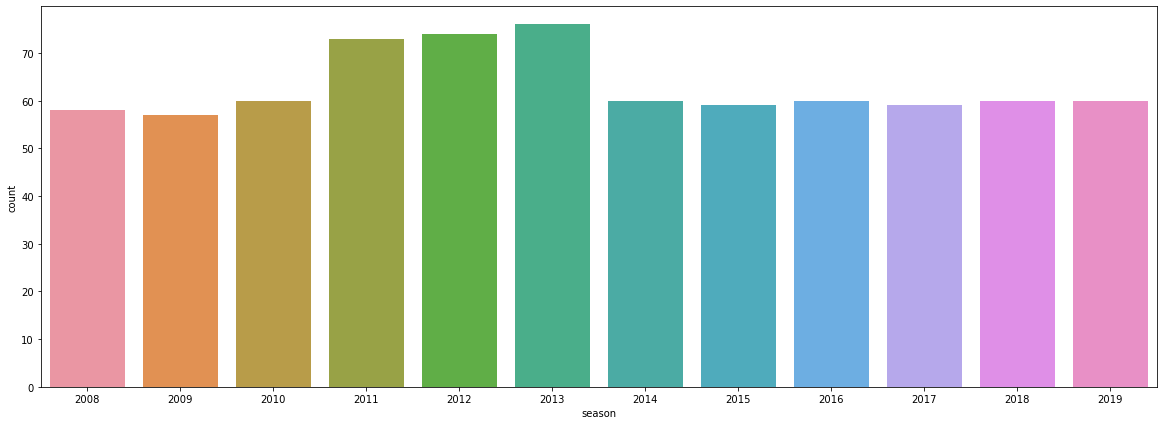

In [29]:
#looking towards the countplot graph for each year how many matches got played.
plt.figure(figsize=(20,7))
sns.countplot(df_matches['season'])
plt.show()

In [30]:
df_matches['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [31]:
df_matches['team2'].value_counts()

Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team2, dtype: int64

So in the above we can see that there are two teams which are belong from a same team name but they are containing different values. Those variables are 'Rising Pune Supergiant' and 'Rising Pune Supergiants'. So let's make them one team by using replace function. Before making these changes let's check the other variables which can have team name or we can say let's findout which other variables may be affected by the team names.

In [32]:
df_matches['toss_winner'].value_counts()
# here also we can see that we have those same teams names repeated.

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [33]:
df_matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
match cancelled                  4
Name: winner, dtype: int64

So as we can notice that those variables are the only variable which have a probability of being affected by the team names.
Now we can do changes by using replace function.

In [34]:
df_matches['team1']= df_matches['team1'].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df_matches['team2']= df_matches['team2'].replace("Rising Pune Supergiant","Rising Pune Supergiants")

df_matches['winner']= df_matches['winner'].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df_matches['toss_winner']= df_matches['toss_winner'].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [35]:
df_matches_team = df_matches[['team1','team2','winner','toss_winner']]
df_matches_team.head()

team1                        team2  \
0          Sunrisers Hyderabad  Royal Challengers Bangalore   
1               Mumbai Indians      Rising Pune Supergiants   
2                Gujarat Lions        Kolkata Knight Riders   
3      Rising Pune Supergiants              Kings XI Punjab   
4  Royal Challengers Bangalore             Delhi Daredevils   

                        winner                  toss_winner  
0          Sunrisers Hyderabad  Royal Challengers Bangalore  
1      Rising Pune Supergiants      Rising Pune Supergiants  
2        Kolkata Knight Riders        Kolkata Knight Riders  
3              Kings XI Punjab              Kings XI Punjab  
4  Royal Challengers Bangalore  Royal Challengers Bangalore

In [36]:
df_matches

season            city                        team1  \
0      2017       Hyderabad          Sunrisers Hyderabad   
1      2017            Pune               Mumbai Indians   
2      2017          Rajkot                Gujarat Lions   
3      2017          Indore      Rising Pune Supergiants   
4      2017       Bangalore  Royal Challengers Bangalore   
5      2017       Hyderabad                Gujarat Lions   
6      2017          Mumbai        Kolkata Knight Riders   
7      2017          Indore  Royal Challengers Bangalore   
8      2017            Pune             Delhi Daredevils   
9      2017          Mumbai          Sunrisers Hyderabad   
10     2017         Kolkata              Kings XI Punjab   
11     2017       Bangalore  Royal Challengers Bangalore   
12     2017          Rajkot      Rising Pune Supergiants   
13     2017         Kolkata        Kolkata Knight Riders   
14     2017           Delhi             Delhi Daredevils   
15     2017          Mumbai                Gujarat Lions   
16     2017       Bangalore      Rising Pune Supergiants   
17     2017           Delhi             Delhi Daredevils   
18     2017       Hyderabad          Sunrisers Hyderabad   
19     2017          Rajkot  Royal Challengers Bangalore   
20     2017       Hyderabad          Sunrisers Hyderabad   
21     2017          Indore              Kings XI Punjab   
22     2017         Kolkata        Kolkata Knight Riders   
23     2017          Mumbai               Mumbai Indians   
24     2017            Pune          Sunrisers Hyderabad   
25     2017          Rajkot              Kings XI Punjab   
26     2017         Kolkata        Kolkata Knight Riders   
27     2017          Mumbai      Rising Pune Supergiants   
28     2017            Pune      Rising Pune Supergiants   
29     2017       Bangalore  Royal Challengers Bangalore   
30     2017         Kolkata             Delhi Daredevils   
31     2017      Chandigarh          Sunrisers Hyderabad   
32     2017            Pune      Rising Pune Supergiants   
33     2017          Rajkot                Gujarat Lions   
34     2017      Chandigarh             Delhi Daredevils   
35     2017       Hyderabad          Sunrisers Hyderabad   
36     2017          Mumbai  Royal Challengers Bangalore   
37     2017            Pune                Gujarat Lions   
38     2017           Delhi          Sunrisers Hyderabad   
39     2017         Kolkata        Kolkata Knight Riders   
40     2017           Delhi                Gujarat Lions   
41     2017       Bangalore              Kings XI Punjab   
42     2017       Hyderabad      Rising Pune Supergiants   
43     2017           Delhi               Mumbai Indians   
44     2017       Bangalore  Royal Challengers Bangalore   
45     2017      Chandigarh              Kings XI Punjab   
46     2017       Hyderabad               Mumbai Indians   
47     2017      Chandigarh              Kings XI Punjab   
48     2017          Kanpur                Gujarat Lions   
49     2017          Mumbai              Kings XI Punjab   
50     2017           Delhi             Delhi Daredevils   
51     2017          Kanpur                Gujarat Lions   
52     2017         Kolkata               Mumbai Indians   
53     2017            Pune              Kings XI Punjab   
54     2017           Delhi  Royal Challengers Bangalore   
55     2017          Mumbai      Rising Pune Supergiants   
56     2017       Bangalore          Sunrisers Hyderabad   
57     2017       Bangalore        Kolkata Knight Riders   
58     2017       Hyderabad               Mumbai Indians   
59     2008       Bangalore        Kolkata Knight Riders   
60     2008      Chandigarh          Chennai Super Kings   
61     2008           Delhi             Rajasthan Royals   
62     2008          Mumbai               Mumbai Indians   
63     2008         Kolkata              Deccan Chargers   
64     2008          Jaipur              Kings XI Punjab   
65     2008       Hyderabad              Decc

In [37]:
for i in df_matches_team.columns:
    print(df_matches_team[i].value_counts())
    print('------------------------------------------------------------')

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64
------------------------------------------------------------
Royal Challengers Bangalore    95
Kolkata Knight Riders          95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Rising Pune Supergiants        15
Delhi Capitals 

Now in the above we can see that all giant got changed to giants and we successfully did the replacement.

**Now let's check the other variables and their value counts**

In [38]:
df_matches['toss_decision'].value_counts()
# So here we can see that many times teams chose to do fielding rather than choosing batting.

field    463
bat      293
Name: toss_decision, dtype: int64

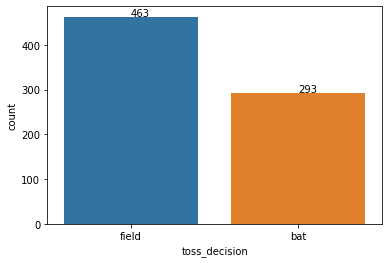

In [39]:
sns.countplot(df_matches['toss_decision'])
plt.text(x = 0, y = df_matches['toss_decision'].value_counts()[0] + 1, s = df_matches['toss_decision'].value_counts()[0])
plt.text(x = 1, y = df_matches['toss_decision'].value_counts()[1] + 1, s = df_matches['toss_decision'].value_counts()[1])
plt.show()
# from the below plot it's clearly shows that there is huge imbalance in the data.
# we have 463 fielding records and 293 batting records.
# So here we can confirm that most of the teams are choosing fielding first rather than choosing batting.

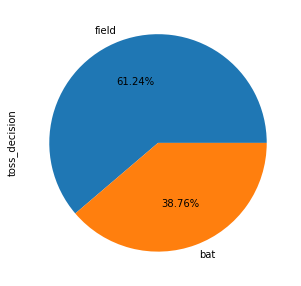

In [40]:
df_matches['toss_decision'].value_counts().plot(kind='pie',autopct='%0.2f%%',figsize=(5,5))
plt.show()

In [41]:
df_matches['result'].value_counts()
# Here as we can notice that the tie value is indicating towards the match draw symptoms.
# And similarly we can notice that the no result is describing the cancellation of matches.


# So if the two type of values are shorted then the rest one which is normal we can say that it is indicating the win/loss of
# the matches which is behaving normal and showing that the match happened and the result is not tie and someone won.

normal       743
tie            9
no result      4
Name: result, dtype: int64

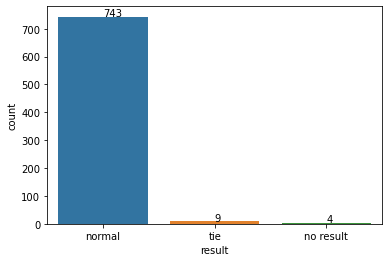

In [42]:
sns.countplot(df_matches['result'])
plt.text(x = 0, y = df_matches['result'].value_counts()[0] + 1, s = df_matches['result'].value_counts()[0])
plt.text(x = 1, y = df_matches['result'].value_counts()[1] + 1, s = df_matches['result'].value_counts()[1])
plt.text(x = 2, y = df_matches['result'].value_counts()[2] + 1, s = df_matches['result'].value_counts()[2])
plt.show()
# from the below plot it's clearly shows that there is huge imbalance in the data.
# we have 743 normal records and 9 tie records and 4 no result records.

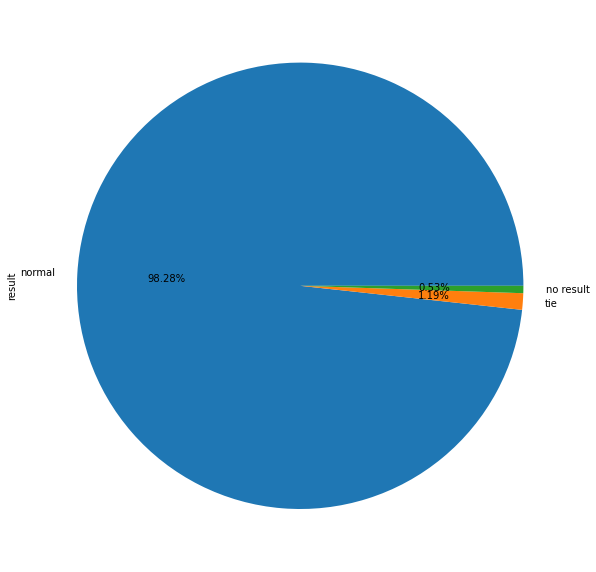

In [43]:
df_matches['result'].value_counts().plot(kind='pie',autopct='%0.2f%%',figsize=(10,25))
plt.show()

In [44]:
df_matches['dl_applied'].value_counts()
# full form of 'dl_applied' is "Dockworth Lewis method".

# This method will only be applied if the range falls.
# Here the 0 is showing that DL method not applied.
# and 1 is showing that DL method applied.

0    737
1     19
Name: dl_applied, dtype: int64

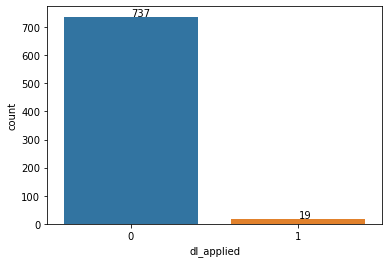

In [45]:
sns.countplot(df_matches['dl_applied'])
plt.text(x = 0, y = df_matches['dl_applied'].value_counts()[0] + 1, s = df_matches['dl_applied'].value_counts()[0])
plt.text(x = 1, y = df_matches['dl_applied'].value_counts()[1] + 1, s = df_matches['dl_applied'].value_counts()[1])
plt.show()

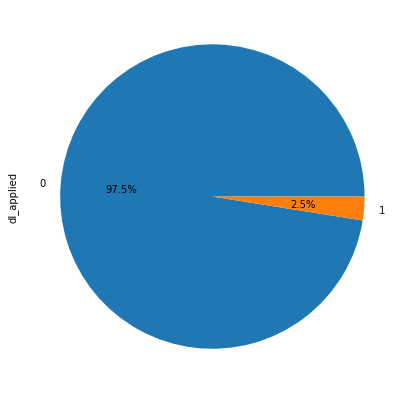

In [46]:
df_matches['dl_applied'].value_counts().plot(kind='pie',autopct='%0.1f%%',figsize=(10,7))
plt.show()

In [47]:
df_matches['player_of_match'].value_counts()

CH Gayle             21
AB de Villiers       20
RG Sharma            17
MS Dhoni             17
DA Warner            17
YK Pathan            16
SR Watson            15
SK Raina             14
G Gambhir            13
MEK Hussey           12
AM Rahane            12
V Kohli              12
V Sehwag             11
DR Smith             11
AD Russell           11
A Mishra             11
JH Kallis            10
KA Pollard           10
SE Marsh              9
AT Rayudu             9
SP Narine             9
Harbhajan Singh       8
SR Tendulkar          8
RA Jadeja             8
UT Yadav              8
Rashid Khan           7
RV Uthappa            7
AC Gilchrist          7
M Vijay               6
RR Pant               6
S Dhawan              6
SL Malinga            6
A Nehra               6
BJ Hodge              6
HH Pandya             6
SC Ganguly            5
SPD Smith             5
PA Patel              5
KC Sangakkara         5
DPMD Jayawardene      5
BB McCullum           5
JP Faulkner     

In [48]:
# these are the top 10 players with most man of the matches awards.
df_matches['player_of_match'].value_counts()[0:10]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

In [49]:
# similarly they are the top 5 players who got the highest number of man of the matches awards.
df_matches['player_of_match'].value_counts()[0:5]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

In [50]:
# let's see the bar plot for the variable.
pe.bar(df_matches['player_of_match'].value_counts()[0:5])

In [51]:
df_matches['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

In [52]:
# how many team won the match while batting first.
# and we know that if the team is winning the match while batting first then the "win_by_runs" variable can not be 0.
# similarly if the team wins the match with fielding first and won with 2nd batting then the "win_by_wickets" can not be 0.
# So let's check both of them.
batting_first = df_matches[df_matches['win_by_runs']!=0]
batting_first.head()

season       city                        team1  \
0     2017  Hyderabad          Sunrisers Hyderabad   
4     2017  Bangalore  Royal Challengers Bangalore   
8     2017       Pune             Delhi Daredevils   
13    2017    Kolkata        Kolkata Knight Riders   
14    2017      Delhi             Delhi Daredevils   

                          team2                  toss_winner toss_decision  \
0   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4              Delhi Daredevils  Royal Challengers Bangalore           bat   
8       Rising Pune Supergiants      Rising Pune Supergiants         field   
13          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
14              Kings XI Punjab             Delhi Daredevils           bat   

    result  dl_applied                       winner  win_by_runs  \
0   normal           0          Sunrisers Hyderabad           35   
4   normal           0  Royal Challengers Bangalore           15   
8   normal           0             Delhi Daredevils           97   
13  normal           0        Kolkata Knight Riders           17   
14  normal           0             Delhi Daredevils           51   

    win_by_wickets player_of_match          umpire1        umpire2  
0                0    Yuvraj Singh      AY Dandekar       NJ Llong  
4                0       KM Jadhav  HDPK Dharmasena  C Shamshuddin  
8                0       SV Samson      AY Dandekar         S Ravi  
13               0      RV Uthappa      AY Dandekar       NJ Llong  
14               0     CJ Anderson         YC Barde    Nitin Menon

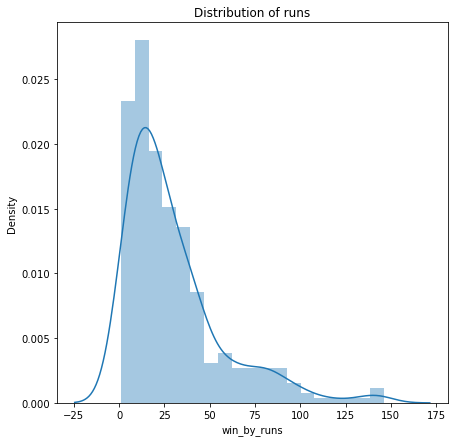

In [53]:
# Let's see the visualization part for the team who won the matches with batting first.
plt.figure(figsize=(7,7))
sns.distplot(batting_first['win_by_runs'])
plt.title('Distribution of runs')
plt.show()

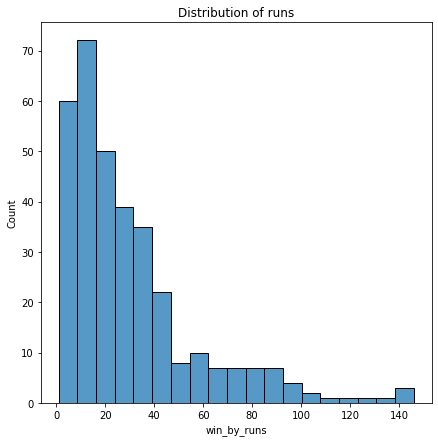

In [54]:
plt.figure(figsize=(7,7))
sns.histplot(batting_first['win_by_runs'])
plt.title('Distribution of runs')
plt.show()

In [55]:
# looking to the 3d diagram
pe.histogram(batting_first['win_by_runs'])

In [56]:
# finding the number of wins with respect to each team after batting first.
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Rising Pune Supergiants         7
Pune Warriors                   6
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

In [57]:
pe.bar(batting_first['winner'].value_counts()[0:3])

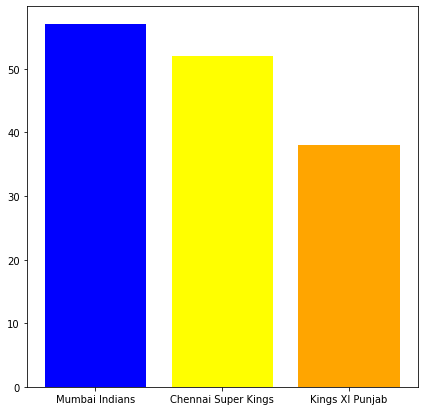

In [58]:
# let's see the bar graph for the winner teams with their frequency of being win.
plt.figure(figsize=(7,7))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=['blue','yellow','orange'])
plt.show()

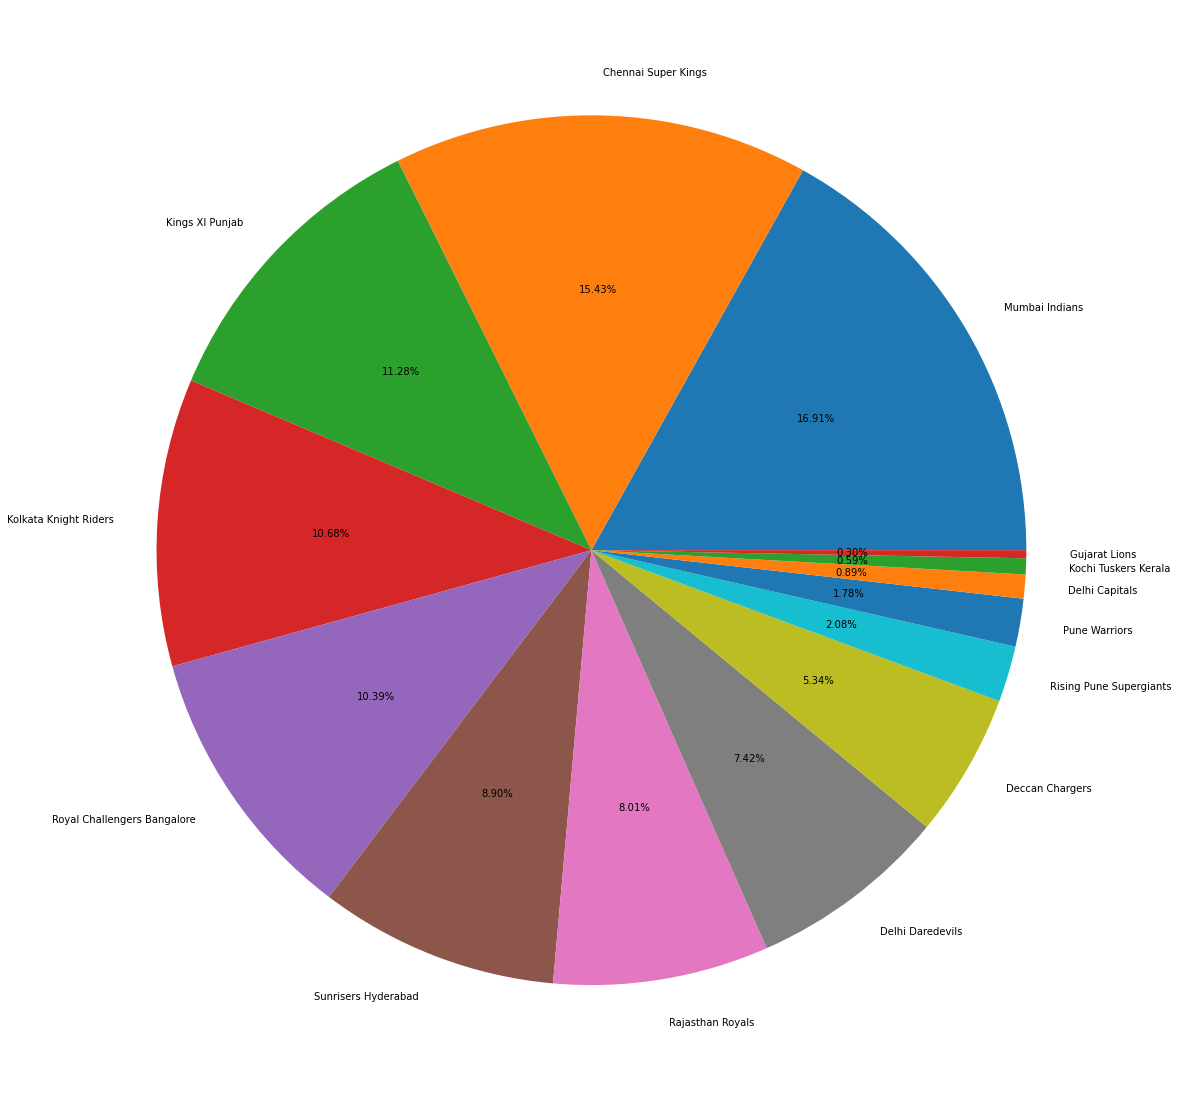

In [59]:
plt.figure(figsize=(20,20))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.2f%%')
plt.show()

In [60]:
batting_second = df_matches[df_matches['win_by_wickets']!=0]
batting_second.head()

season       city                    team1                    team2  \
1    2017       Pune           Mumbai Indians  Rising Pune Supergiants   
2    2017     Rajkot            Gujarat Lions    Kolkata Knight Riders   
3    2017     Indore  Rising Pune Supergiants          Kings XI Punjab   
5    2017  Hyderabad            Gujarat Lions      Sunrisers Hyderabad   
6    2017     Mumbai    Kolkata Knight Riders           Mumbai Indians   

               toss_winner toss_decision  result  dl_applied  \
1  Rising Pune Supergiants         field  normal           0   
2    Kolkata Knight Riders         field  normal           0   
3          Kings XI Punjab         field  normal           0   
5      Sunrisers Hyderabad         field  normal           0   
6           Mumbai Indians         field  normal           0   

                    winner  win_by_runs  win_by_wickets player_of_match  \
1  Rising Pune Supergiants            0               7       SPD Smith   
2    Kolkata Knight Riders            0              10         CA Lynn   
3          Kings XI Punjab            0               6      GJ Maxwell   
5      Sunrisers Hyderabad            0               9     Rashid Khan   
6           Mumbai Indians            0               4          N Rana   

          umpire1        umpire2  
1  A Nand Kishore         S Ravi  
2     Nitin Menon      CK Nandan  
3    AK Chaudhary  C Shamshuddin  
5      A Deshmukh       NJ Llong  
6     Nitin Menon      CK Nandan

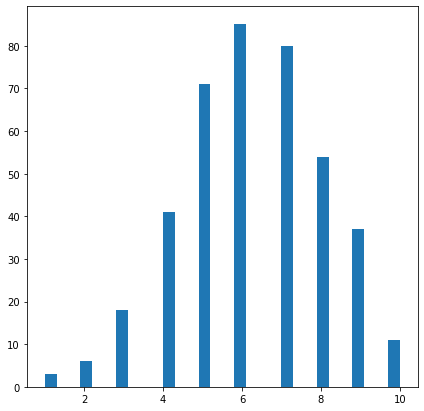

In [61]:
# making a histogram for frequency of wins with batting second with respect to number of wickets.
plt.figure(figsize=(7,7))
plt.hist(batting_second['win_by_wickets'],bins=30)
plt.show()

In [62]:
# finding out the frequency of number of wins with respect to each time after batting second.
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Pune Warriors                   6
Delhi Capitals                  6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

In [63]:
# As we can see that Kolkata Knight Riders performs well while batting second.
# after that we have mumbai indians then RCB,then CSK,then RR, then punjab and so on.

In [64]:
list(batting_second['winner'].value_counts()[0:3].keys())

['Kolkata Knight Riders', 'Mumbai Indians', 'Royal Challengers Bangalore']

In [65]:
list(batting_second['winner'].value_counts()[0:3])

[56, 50, 48]

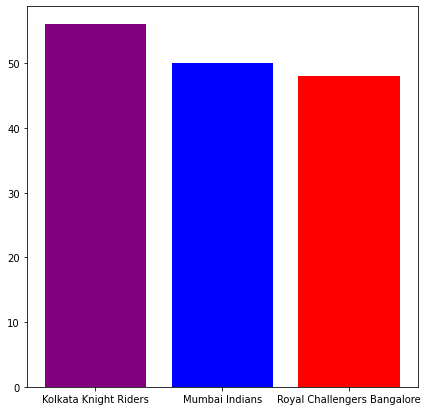

In [66]:
# let's see the bar graph for the winner teams with their frequency of being win.
plt.figure(figsize=(7,7))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=['purple','blue','red'])
plt.show()

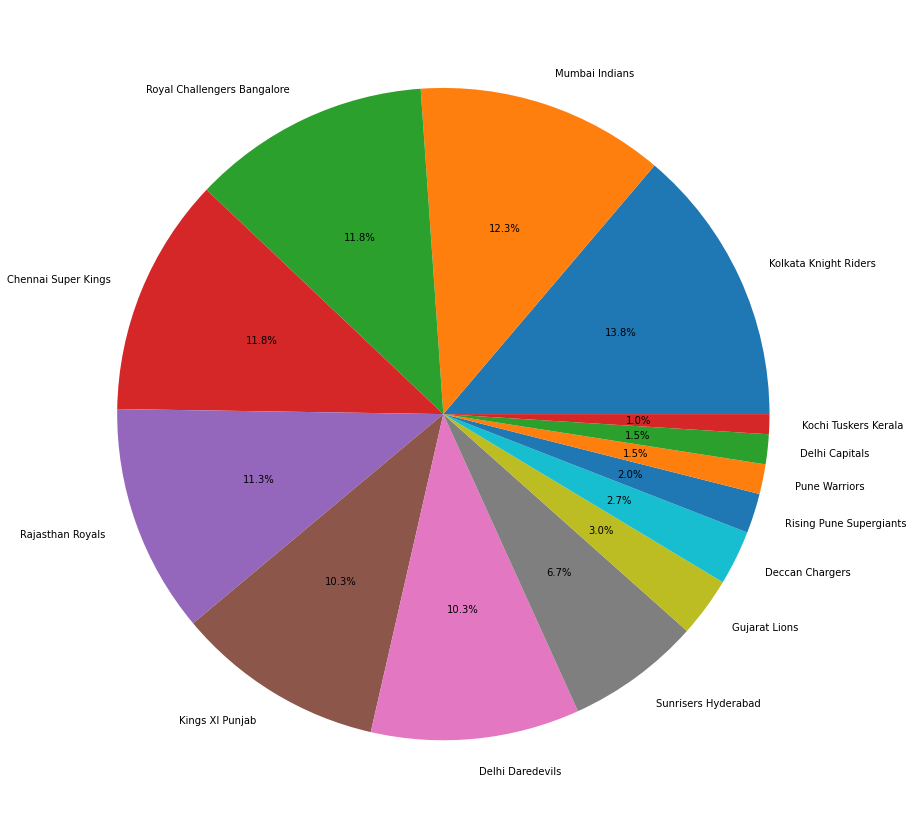

In [67]:
# making a pie chart for the distribution of most wins after batting second.
plt.figure(figsize=(15,15))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [68]:
# finding out how many times a team has won the match after winning the toss.
df_matches[df_matches['toss_winner']==df_matches['winner']]

season            city                        team1  \
1      2017            Pune               Mumbai Indians   
2      2017          Rajkot                Gujarat Lions   
3      2017          Indore      Rising Pune Supergiants   
4      2017       Bangalore  Royal Challengers Bangalore   
5      2017       Hyderabad                Gujarat Lions   
6      2017          Mumbai        Kolkata Knight Riders   
9      2017          Mumbai          Sunrisers Hyderabad   
10     2017         Kolkata              Kings XI Punjab   
11     2017       Bangalore  Royal Challengers Bangalore   
12     2017          Rajkot      Rising Pune Supergiants   
14     2017           Delhi             Delhi Daredevils   
15     2017          Mumbai                Gujarat Lions   
20     2017       Hyderabad          Sunrisers Hyderabad   
21     2017          Indore              Kings XI Punjab   
22     2017         Kolkata        Kolkata Knight Riders   
24     2017            Pune          Sunrisers Hyderabad   
28     2017            Pune      Rising Pune Supergiants   
29     2017       Bangalore  Royal Challengers Bangalore   
30     2017         Kolkata             Delhi Daredevils   
34     2017      Chandigarh             Delhi Daredevils   
37     2017            Pune                Gujarat Lions   
38     2017           Delhi          Sunrisers Hyderabad   
39     2017         Kolkata        Kolkata Knight Riders   
40     2017           Delhi                Gujarat Lions   
44     2017       Bangalore  Royal Challengers Bangalore   
45     2017      Chandigarh              Kings XI Punjab   
48     2017          Kanpur                Gujarat Lions   
50     2017           Delhi             Delhi Daredevils   
51     2017          Kanpur                Gujarat Lions   
53     2017            Pune              Kings XI Punjab   
54     2017           Delhi  Royal Challengers Bangalore   
56     2017       Bangalore          Sunrisers Hyderabad   
57     2017       Bangalore        Kolkata Knight Riders   
58     2017       Hyderabad               Mumbai Indians   
60     2008      Chandigarh          Chennai Super Kings   
67     2008       Hyderabad              Deccan Chargers   
69     2008       Bangalore  Royal Challengers Bangalore   
71     2008          Mumbai               Mumbai Indians   
73     2008       Bangalore          Chennai Super Kings   
76     2008       Hyderabad              Deccan Chargers   
77     2008          Jaipur             Rajasthan Royals   
80     2008      Chandigarh              Kings XI Punjab   
83     2008       Bangalore  Royal Challengers Bangalore   
84     2008         Chennai          Chennai Super Kings   
85     2008          Mumbai             Rajasthan Royals   
86     2008           Delhi             Delhi Daredevils   
87     2008         Kolkata        Kolkata Knight Riders   
88     2008          Jaipur              Deccan Chargers   
89     2008       Bangalore  Royal Challengers Bangalore   
91     2008       Hyderabad        Kolkata Knight Riders   
92     2008          Jaipur             Delhi Daredevils   
94     2008         Kolkata        Kolkata Knight Riders   
95     2008          Mumbai          Chennai Super Kings   
98     2008          Mumbai        Kolkata Knight Riders   
103    2008       Bangalore  Royal Challengers Bangalore   
104    2008         Kolkata        Kolkata Knight Riders   
106    2008         Chennai  Royal Challengers Bangalore   
107    2008      Chandigarh              Deccan Chargers   
108    2008           Delhi               Mumbai Indians   
109    2008         Chennai             Rajasthan Royals   
112    2008          Jaipur               Mumbai Indians   
116    2008          Mumbai          Chennai Super Kings   
118    2009       Cape Town  Royal Challengers Bangalore   
119    2009       Cape Town              Kings XI Punjab   
121    2009  Port Elizabeth          Chennai Super Kings   
122    2009          Durban              King

In [69]:
# we can see in the above that we got 393 rows affected so lets cross check it and see the total sum.
np.sum(df_matches['toss_winner']==df_matches['winner'])

393

In [70]:
#it will show the percentage of winning the match after winning the toss.
393/756

0.5198412698412699

In [71]:
# we can see in the above that by winning the toss can not decide the winning probability of matches because it is 52% which is
# not enough to give a clear statemnet. it still have 50-50 chance.

In [72]:
# who is the best performer in the ipl matches?
# which team won highest times?
print(f"Player with Most Man of the Match awards: {df_matches['player_of_match'].value_counts().idxmax()}")
print(f"Team that won highest number of matches: {df_matches['winner'].value_counts().idxmax()}")

Player with Most Man of the Match awards: CH Gayle
Team that won highest number of matches: Mumbai Indians


# Number of matches played in various cities

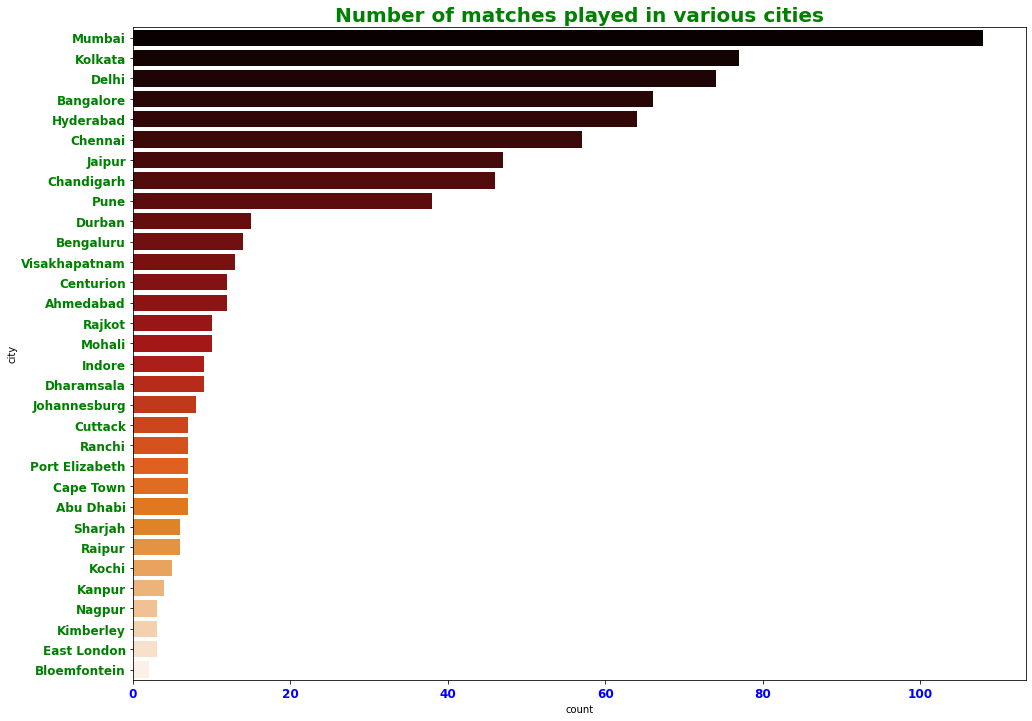

In [73]:
plt.figure(figsize = (16,12))
order_list = df_matches["city"].value_counts().index
sns.countplot(y=df_matches["city"], palette='gist_heat', order = order_list)

plt.title('Number of matches played in various cities', fontsize = 20, fontweight = 'bold', color = 'Green')
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'blue')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'green')

plt.show()

# Toss Decision across different season

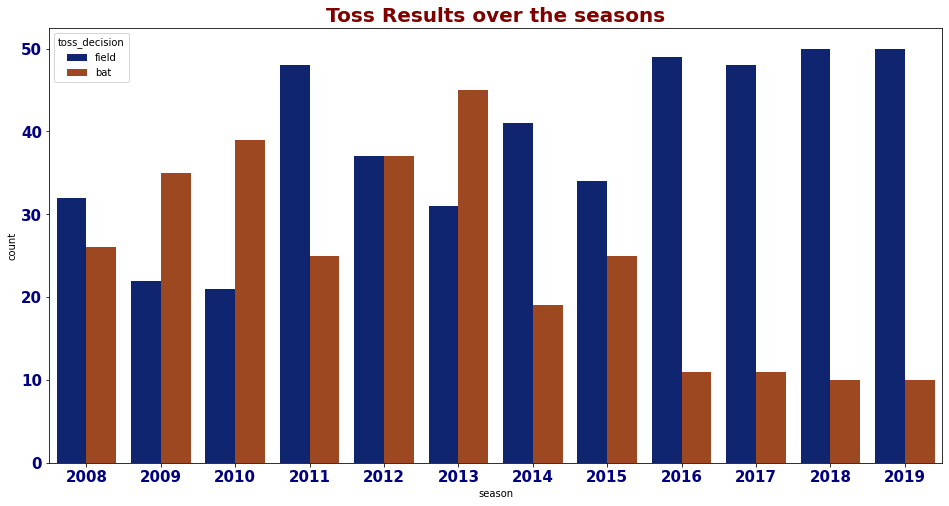

In [74]:
plt.figure(figsize=(16,8))
sns.countplot(x=df_matches['season'],hue=df_matches['toss_decision'],palette = 'dark')
plt.title('Toss Results over the seasons', fontsize = 20, fontweight = 'bold', color = 'maroon')

plt.xticks(fontsize = 15, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 15, fontweight = 'bold', color = 'navy')
plt.show()

# Number of Matches played by each team

In [75]:
display(df_matches["team1"].value_counts().to_frame().rename({'team1': 'NumOfMatches'}, axis =1).style.
        background_gradient('RdBu'))

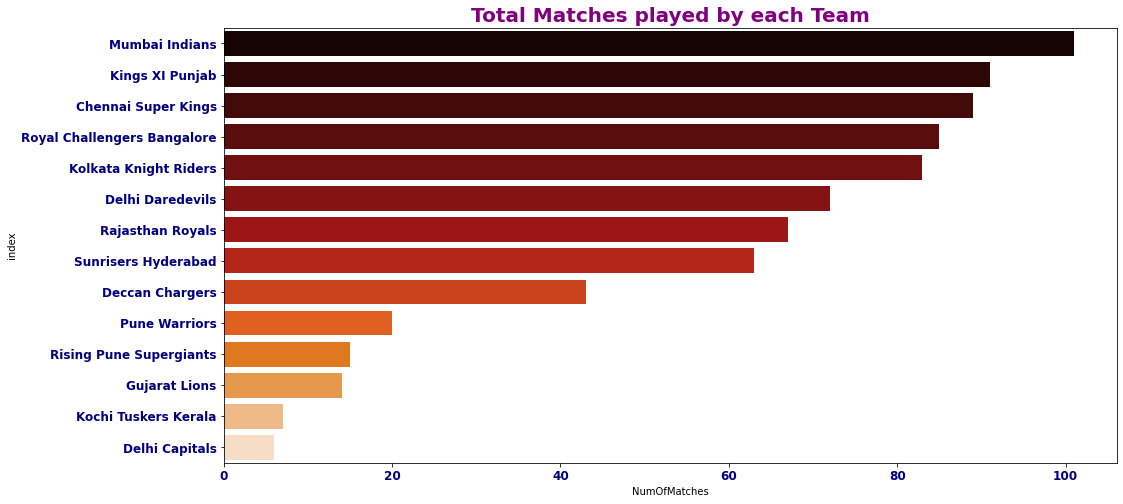

In [76]:
num_matches = df_matches["team1"].value_counts().to_frame().reset_index().rename({'team1': 'NumOfMatches'}, axis =1)
plt.figure(figsize = (16,8))
sns.barplot(y=num_matches['index'],x=num_matches['NumOfMatches'], palette='gist_heat')
plt.title('Total Matches played by each Team', fontsize = 20, fontweight = 'bold', color = 'purple')

plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.show()

# Number of Matches won by each team

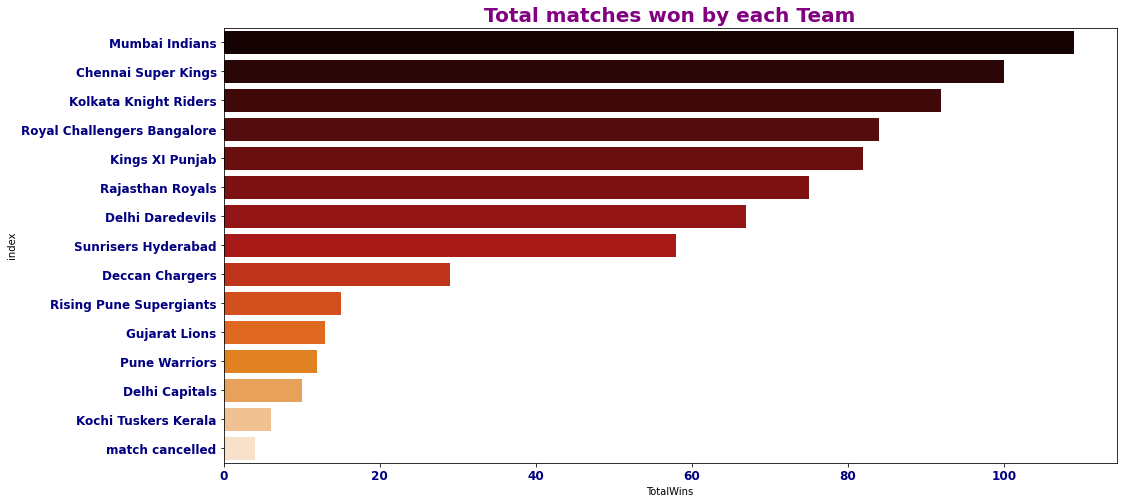

In [77]:
display(df_matches["winner"].value_counts().to_frame().rename({'winner': 'TotalWins'}, axis =1).
        style.background_gradient('RdBu'))


matches_won = df_matches["winner"].value_counts().to_frame().reset_index().rename({'winner': 'TotalWins'}, axis =1)
plt.figure(figsize = (16,8))
sns.barplot(y=matches_won['index'],x=matches_won['TotalWins'], palette='gist_heat')
plt.title('Total matches won by each Team', fontsize = 20, fontweight = 'bold', color = 'purple')

plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.show()

# Top 10 players with Most Player of Match awards in each Season.

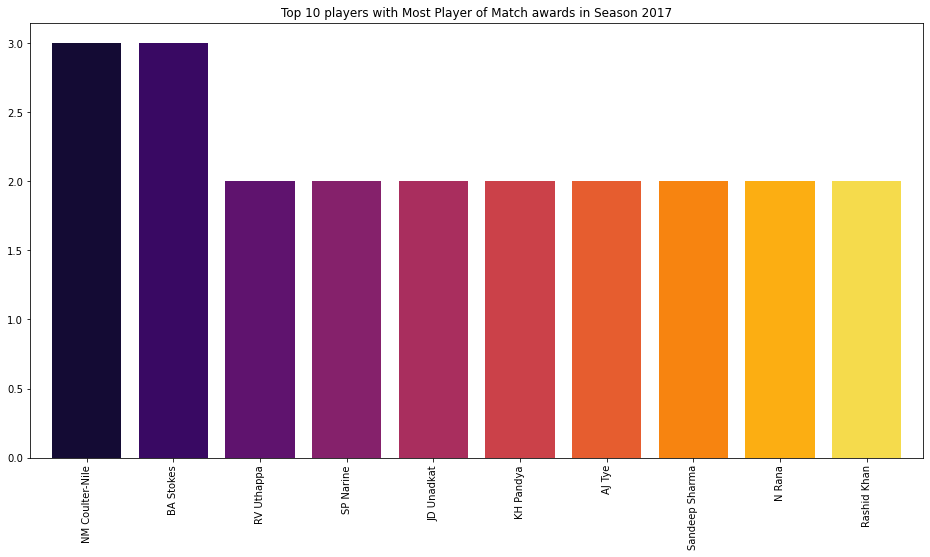

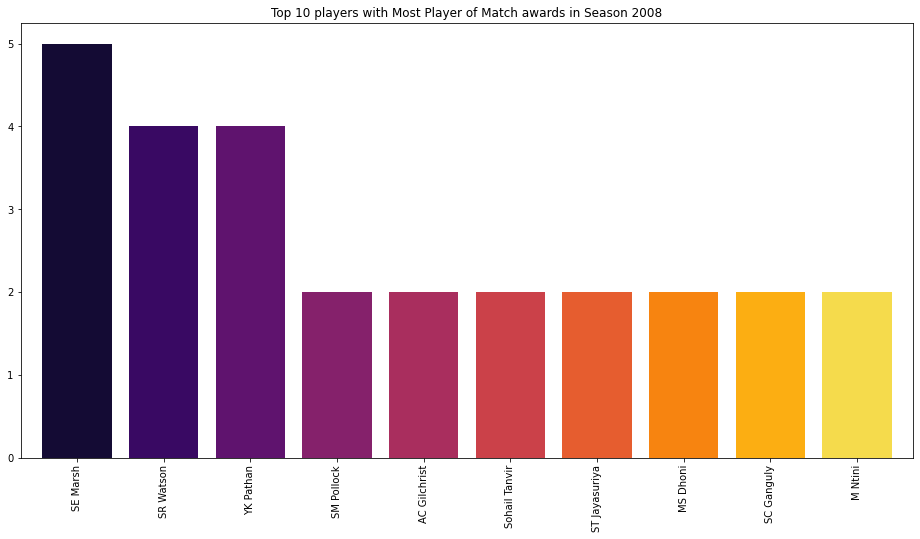

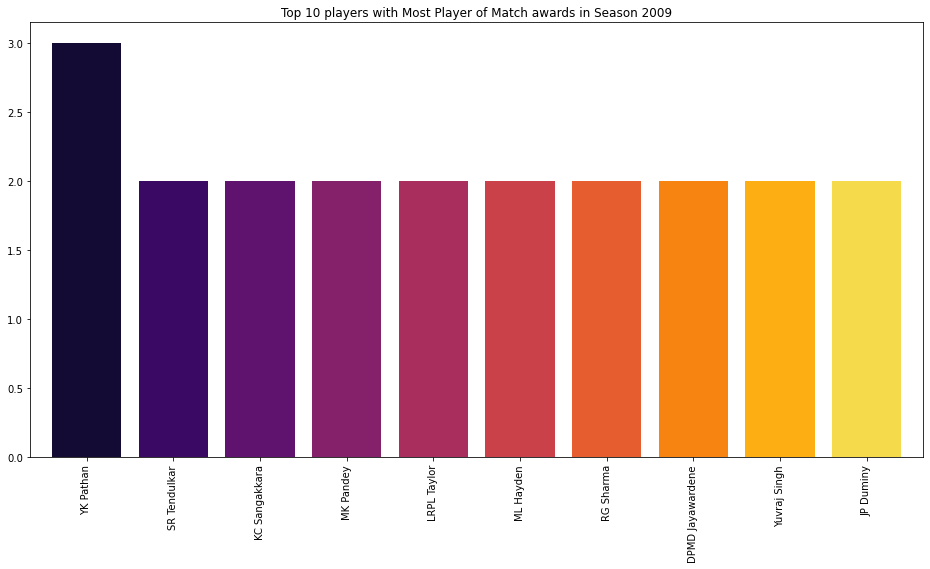

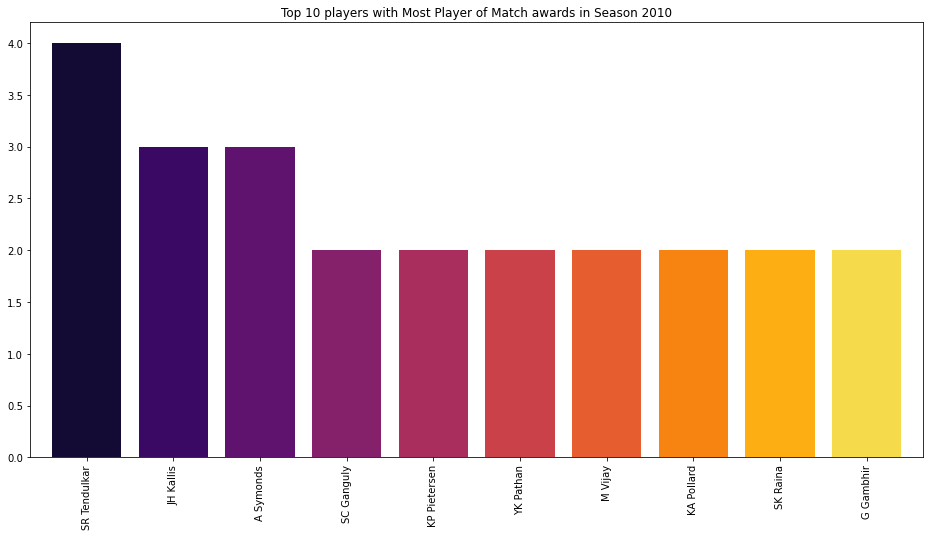

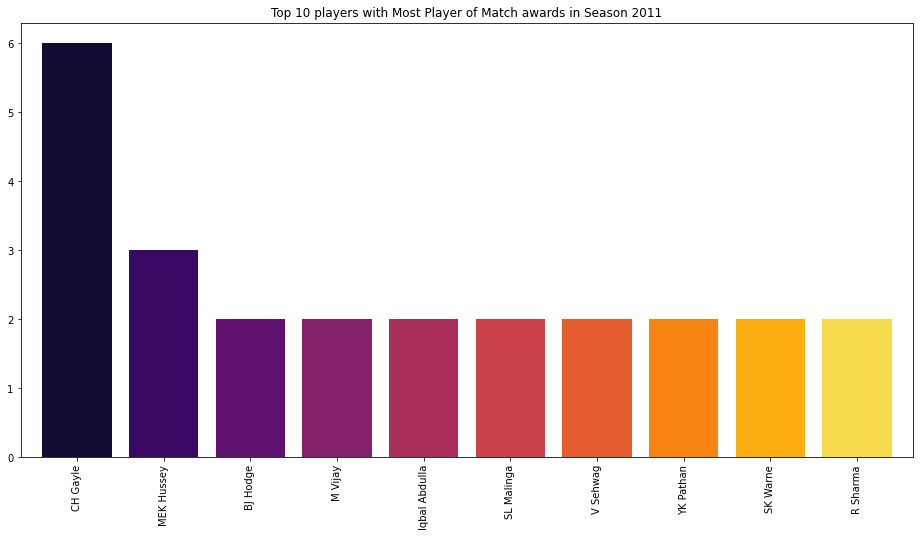

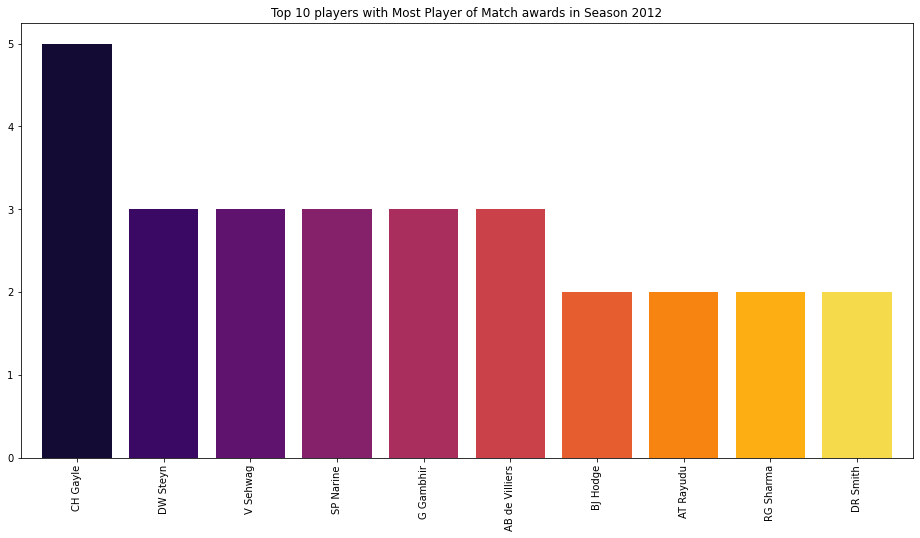

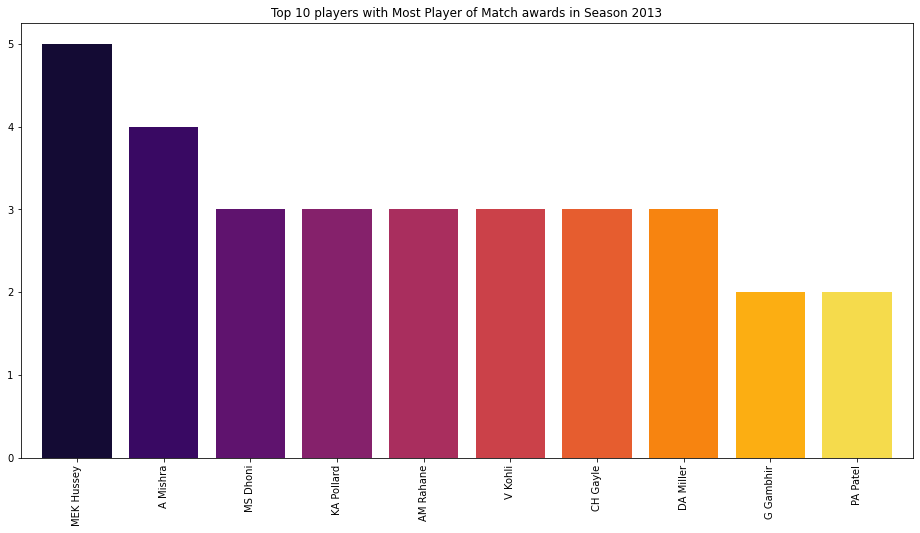

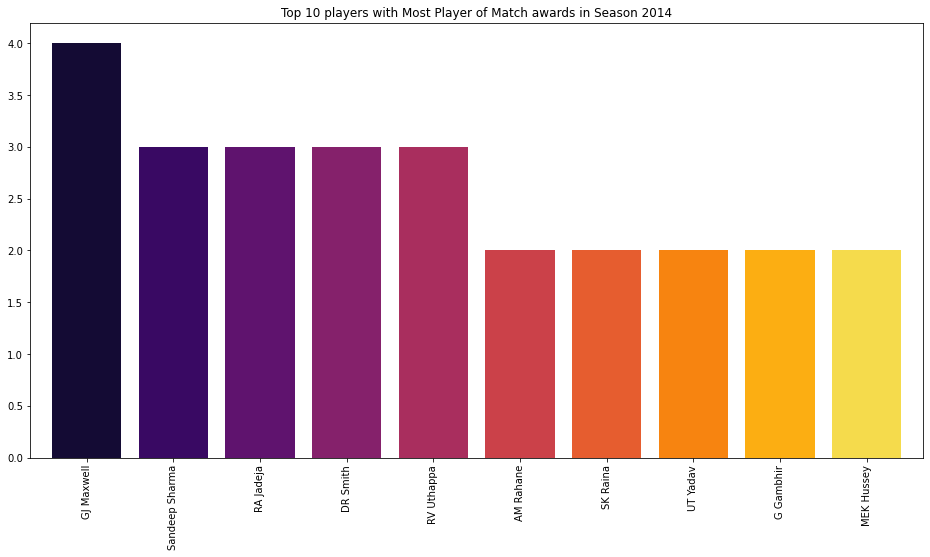

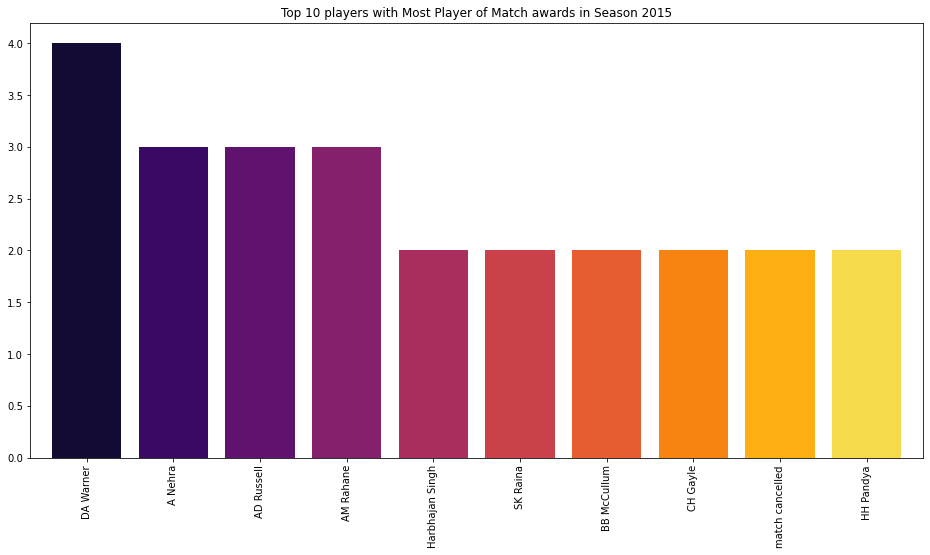

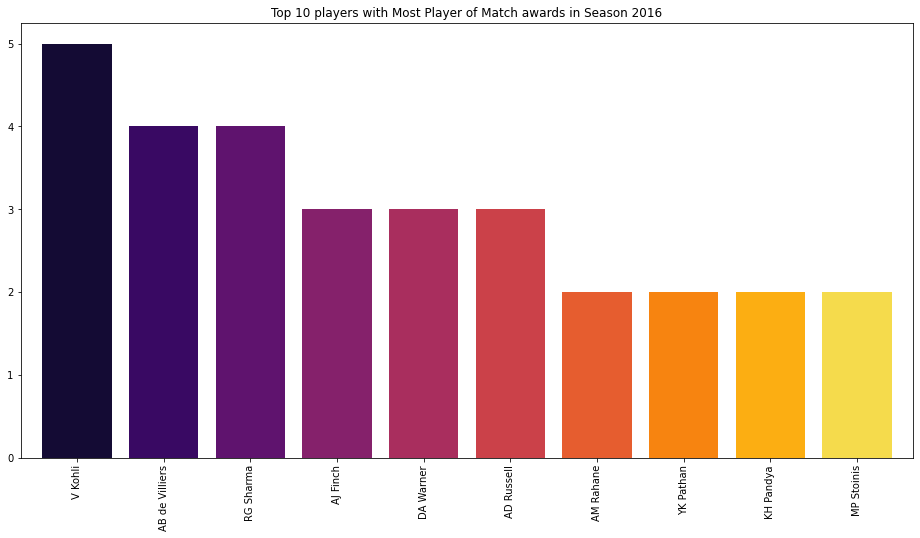

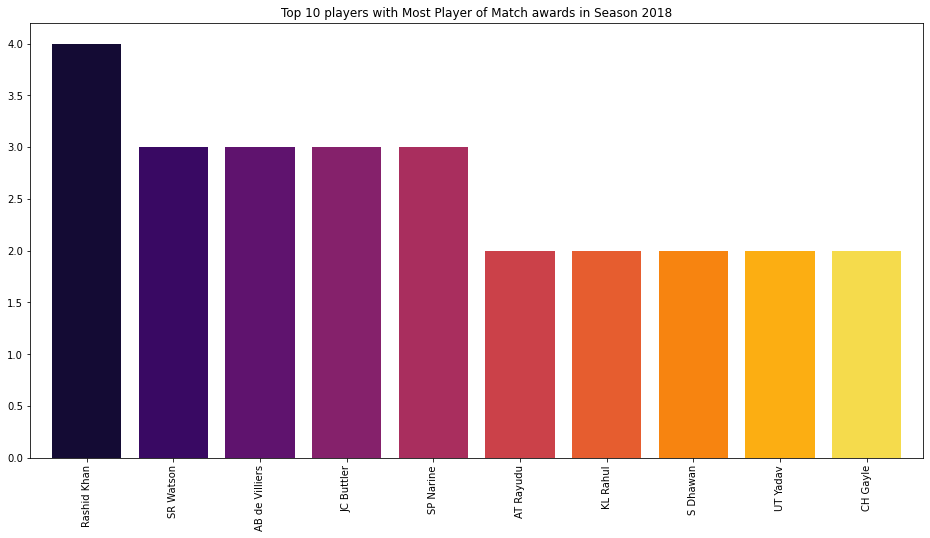

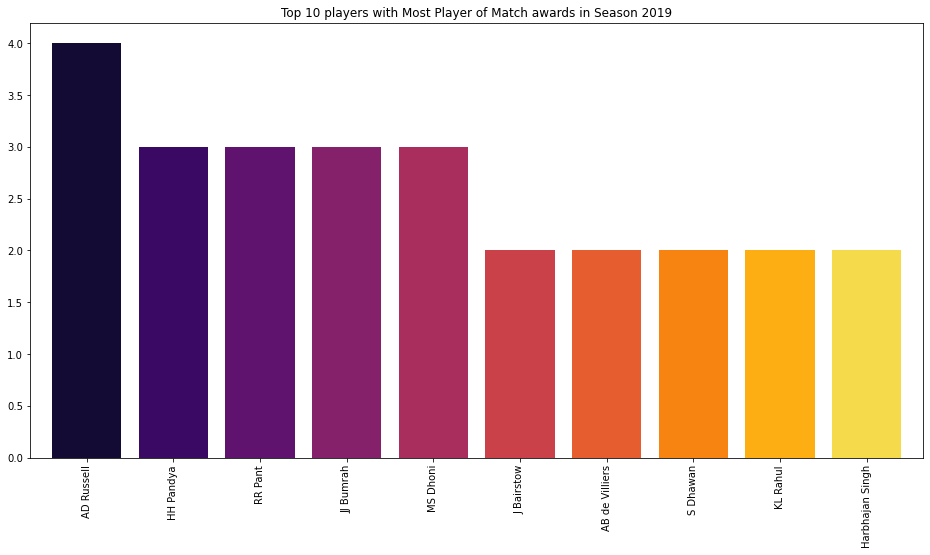

In [78]:
years_list = df_matches['season'].unique().tolist()
for i in years_list: 
    ax = df_matches[df_matches['season'] == i]['player_of_match'].value_counts().head(10).plot.bar(width=0.8, color=sns.color_palette('inferno',10), figsize = (16,8)) 
    
    ax.set_title(f'Top 10 players with Most Player of Match awards in Season {i}')
    plt.show()

In [79]:
df_matches.dtypes

season              int64
city               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
umpire1            object
umpire2            object
dtype: object

In [81]:
df_matches.head(2)

season       city                team1                        team2  \
0    2017  Hyderabad  Sunrisers Hyderabad  Royal Challengers Bangalore   
1    2017       Pune       Mumbai Indians      Rising Pune Supergiants   

                   toss_winner toss_decision  result  dl_applied  \
0  Royal Challengers Bangalore         field  normal           0   
1      Rising Pune Supergiants         field  normal           0   

                    winner  win_by_runs  win_by_wickets player_of_match  \
0      Sunrisers Hyderabad           35               0    Yuvraj Singh   
1  Rising Pune Supergiants            0               7       SPD Smith   

          umpire1   umpire2  
0     AY Dandekar  NJ Llong  
1  A Nand Kishore    S Ravi

# -------------------------------------------------------------->

# ANALYSING THE NEXT DATASET.

# -------------------------------------------------------------->

**DELIVERIES DATASET**

In [80]:
df_deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  wide_runs  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0          0         0   
1     2  DA Warner    S Dhawan  TS Mills              0          0         0   
2     3  DA Warner    S Dhawan  TS Mills              0          0         0   
3     4  DA Warner    S Dhawan  TS Mills              0          0         0   
4     5  DA Warner    S Dhawan  TS Mills              0          2         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs player_dismissed dismissal_kind fielder  
0           0              NaN            NaN     NaN  
1           0              NaN            NaN     NaN  
2           4              NaN            NaN     NaN  
3           0              NaN            NaN     NaN  
4           2              NaN            NaN     NaN

In [81]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [82]:
df_deliveries.shape

(179078, 21)

In [83]:
df_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [84]:
(df_deliveries.isnull().sum()/len(df_deliveries)*100).sort_values(ascending=False)

fielder             96.399334
dismissal_kind      95.066954
player_dismissed    95.066954
bye_runs             0.000000
total_runs           0.000000
extra_runs           0.000000
batsman_runs         0.000000
penalty_runs         0.000000
noball_runs          0.000000
legbye_runs          0.000000
match_id             0.000000
inning               0.000000
is_super_over        0.000000
bowler               0.000000
non_striker          0.000000
batsman              0.000000
ball                 0.000000
over                 0.000000
bowling_team         0.000000
batting_team         0.000000
wide_runs            0.000000
dtype: float64

In [85]:
df_deliveries.describe()

match_id         inning           over           ball  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean     1802.252957       1.482952      10.162488       3.615587   
std      3472.322805       0.502074       5.677684       1.806966   
min         1.000000       1.000000       1.000000       1.000000   
25%       190.000000       1.000000       5.000000       2.000000   
50%       379.000000       1.000000      10.000000       4.000000   
75%       567.000000       2.000000      15.000000       5.000000   
max     11415.000000       5.000000      20.000000       9.000000   

       is_super_over      wide_runs       bye_runs    legbye_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.000452       0.036721       0.004936       0.021136   
std         0.021263       0.251161       0.116480       0.194908   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       5.000000       4.000000       5.000000   

         noball_runs   penalty_runs   batsman_runs     extra_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.004183       0.000056       1.246864       0.067032   
std         0.070492       0.016709       1.608270       0.342553   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max         5.000000       5.000000       7.000000       7.000000   

          total_runs  
count  179078.000000  
mean        1.313897  
std         1.605422  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max        10.000000

**In this dataset we have all information based on each ball. So In the above if you will see that all the null values which are present in the dataset are indicating that no one got out in that particular ball. So where there is a wicket we are getting the values in those particular variables like who got dismissed and what was the reason and who was the fielder at that time.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
So according to my knowledge we can fill the null values with "no one" in the "player_dismissed" and "fielder" columns, and we can fill "not out" in the "dismissal_kind" variable.**

**Let's fill the null values as we discussed above.**

# NULL VALUES TREATMENT

In [86]:
df_deliveries['player_dismissed'] = df_deliveries['player_dismissed'].fillna('No Nne')
df_deliveries['fielder'] = df_deliveries['fielder'].fillna('No One')
df_deliveries['dismissal_kind']= df_deliveries['dismissal_kind'].fillna('Not out')

In [93]:
df_deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [88]:
# Now we can see that there are no more null values in our dataset.

# UNDERSTANDING THE VARIABLES

In [89]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [90]:
df_deliveries.duplicated().sum()

23

In [91]:
df_deliveries= df_deliveries.drop_duplicates(inplace=False)

In [92]:
df_deliveries.duplicated().sum()

0

**Let's see the details of match_id**

In [94]:
df_deliveries['match_id'].unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

In [95]:
match1 = df_deliveries[df_deliveries['match_id']==1]
match1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  wide_runs  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0          0         0   
1     2  DA Warner    S Dhawan  TS Mills              0          0         0   
2     3  DA Warner    S Dhawan  TS Mills              0          0         0   
3     4  DA Warner    S Dhawan  TS Mills              0          0         0   
4     5  DA Warner    S Dhawan  TS Mills              0          2         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs player_dismissed dismissal_kind fielder  
0           0           No Nne        Not out  No One  
1           0           No Nne        Not out  No One  
2           4           No Nne        Not out  No One  
3           0           No Nne        Not out  No One  
4           2           No Nne        Not out  No One

In [96]:
match1.shape

(248, 21)

In [97]:
# As we all know that match1 was held between Sunrisers Hyderabad and Royal Challengers Bangalore. and the batting team is srh,
# so let's how much srh scored in 1st innings.
srh = match1[match1['inning']==1]
srh.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  wide_runs  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0          0         0   
1     2  DA Warner    S Dhawan  TS Mills              0          0         0   
2     3  DA Warner    S Dhawan  TS Mills              0          0         0   
3     4  DA Warner    S Dhawan  TS Mills              0          0         0   
4     5  DA Warner    S Dhawan  TS Mills              0          2         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs player_dismissed dismissal_kind fielder  
0           0           No Nne        Not out  No One  
1           0           No Nne        Not out  No One  
2           4           No Nne        Not out  No One  
3           0           No Nne        Not out  No One  
4           2           No Nne        Not out  No One

In [98]:
# let's see the scores.
srh['batsman_runs'].value_counts()

1    57
0    32
4    17
6     9
2     9
3     1
Name: batsman_runs, dtype: int64

In [99]:
srh['batsman_runs'].value_counts().sum()
#total scores of "Sunrisers Hyderabad"

125

In [100]:
srh['dismissal_kind'].value_counts()

Not out    121
caught       3
bowled       1
Name: dismissal_kind, dtype: int64

from the above we can see that 121 times no one got out or dismissed, but 3 people got dismissed by getting caught and 1 batsman got out by bowled. so srh lost 4 wickets in total.

In [101]:
# similarly let's check for the 2nd innings which was rcb side. means where innings will be 2.
rcb = match1[match1['inning']==2]
rcb.head()

match_id  inning                 batting_team         bowling_team  over  \
125         1       2  Royal Challengers Bangalore  Sunrisers Hyderabad     1   
126         1       2  Royal Challengers Bangalore  Sunrisers Hyderabad     1   
127         1       2  Royal Challengers Bangalore  Sunrisers Hyderabad     1   
128         1       2  Royal Challengers Bangalore  Sunrisers Hyderabad     1   
129         1       2  Royal Challengers Bangalore  Sunrisers Hyderabad     1   

     ball        batsman    non_striker   bowler  is_super_over  wide_runs  \
125     1       CH Gayle  Mandeep Singh  A Nehra              0          0   
126     2  Mandeep Singh       CH Gayle  A Nehra              0          0   
127     3  Mandeep Singh       CH Gayle  A Nehra              0          0   
128     4  Mandeep Singh       CH Gayle  A Nehra              0          0   
129     5  Mandeep Singh       CH Gayle  A Nehra              0          0   

     bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  \
125         0            0            0             0             1   
126         0            0            0             0             0   
127         0            0            0             0             0   
128         0            0            0             0             2   
129         0            0            0             0             4   

     extra_runs  total_runs player_dismissed dismissal_kind fielder  
125           0           1           No Nne        Not out  No One  
126           0           0           No Nne        Not out  No One  
127           0           0           No Nne        Not out  No One  
128           0           2           No Nne        Not out  No One  
129           0           4           No Nne        Not out  No One

In [102]:
rcb['batsman_runs'].value_counts()

0    49
1    44
4    15
6     8
2     7
Name: batsman_runs, dtype: int64

In [103]:
rcb['batsman_runs'].value_counts().sum()
# it means rcb scored 123 runs and it is cleared that rcb lost the match.

123

In [105]:
# let's see the dismissal reason of players.
rcb['dismissal_kind'].value_counts()

Not out    113
caught       6
bowled       2
run out      2
Name: dismissal_kind, dtype: int64

In [107]:
df_deliveries['batting_team'].nunique()

15

In [108]:
df_deliveries['bowling_team'].nunique()

15

In [110]:
# let's see how many balls played by each batsman.
srh['batsman'].value_counts()

MC Henriques    37
S Dhawan        31
Yuvraj Singh    30
DJ Hooda        12
DA Warner        9
BCJ Cutting      6
Name: batsman, dtype: int64

In [111]:
srh[srh['batsman_runs']==4]['batsman'].value_counts()

Yuvraj Singh    7
S Dhawan        5
MC Henriques    3
DA Warner       2
Name: batsman, dtype: int64

In [112]:
# so in the above we can see how many fours are been scored by each batsman.
# yubraj scored 7 fours out of 30 balls.
# sikhar dhawan scored 5 fours out of 31 balls.
# similarly henriques and david warner scored 3 and 2 fours out of 37 and 9 balls each.

In [114]:
# let's  check how many sixes are there ?
srh[srh['batsman_runs']==6]['batsman'].value_counts()

Yuvraj Singh    3
MC Henriques    2
BCJ Cutting     2
DA Warner       1
DJ Hooda        1
Name: batsman, dtype: int64

In [115]:
# let's see what is the total runs of each player from sunrisers hyderabad team?
print('total run scored by MC henriques during the match between srh and rcb is :',srh[srh['batsman']=='MC Henriques']['total_runs'].value_counts().sum())
print('total run scored by S Dhawan during the match between srh and rcb is :',srh[srh['batsman']=='S Dhawan']['total_runs'].value_counts().sum())
print('total run scored by Yuvraj Singh during the match between srh and rcb is :',srh[srh['batsman']=='Yuvraj Singh']['total_runs'].value_counts().sum())
print('total run scored by DA Warner during the match between srh and rcb is :',srh[srh['batsman']=='DA Warner']['total_runs'].value_counts().sum())
print('total run scored by BCJ Cutting during the match between srh and rcb is :',srh[srh['batsman']=='BCJ Cutting']['total_runs'].value_counts().sum())
print('total run scored by DJ Hooda during the match between srh and rcb is :',srh[srh['batsman']=='DJ Hooda']['total_runs'].value_counts().sum())

total run scored by MC henriques during the match between srh and rcb is : 37
total run scored by S Dhawan during the match between srh and rcb is : 31
total run scored by Yuvraj Singh during the match between srh and rcb is : 30
total run scored by DA Warner during the match between srh and rcb is : 9
total run scored by BCJ Cutting during the match between srh and rcb is : 6
total run scored by DJ Hooda during the match between srh and rcb is : 12


In [116]:
rcb['batsman'].value_counts()

CH Gayle         23
TM Head          22
KM Jadhav        18
SR Watson        17
Mandeep Singh    16
STR Binny        10
YS Chahal         7
Sachin Baby       3
TS Mills          3
S Aravind         2
A Choudhary       2
Name: batsman, dtype: int64

In [117]:
# let's see what is the total runs of each player from rcb team?
print('total run scored by CH Gayle during the match between srh and rcb is :',rcb[rcb['batsman']=='CH Gayle']['total_runs'].value_counts().sum())
print('total run scored by TM Head during the match between srh and rcb is :',rcb[rcb['batsman']=='TM Head']['total_runs'].value_counts().sum())
print('total run scored by KM Jadhav during the match between srh and rcb is :',rcb[rcb['batsman']=='KM Jadhav']['total_runs'].value_counts().sum())
print('total run scored by SR Watson during the match between srh and rcb is :',rcb[rcb['batsman']=='SR Watson']['total_runs'].value_counts().sum())
print('total run scored by Mandeep Singh during the match between srh and rcb is :',rcb[rcb['batsman']=='Mandeep Singh']['total_runs'].value_counts().sum())
print('total run scored by STR Binny during the match between srh and rcb is :',rcb[rcb['batsman']=='STR Binny']['total_runs'].value_counts().sum())
print('total run scored by YS Chahal during the match between srh and rcb is :',rcb[rcb['batsman']=='YS Chahal']['total_runs'].value_counts().sum())
print('total run scored by Sachin Baby during the match between srh and rcb is :',rcb[rcb['batsman']=='Sachin Baby']['total_runs'].value_counts().sum())
print('total run scored by TS Mills during the match between srh and rcb is :',rcb[rcb['batsman']=='TS Mills']['total_runs'].value_counts().sum())
print('total run scored by S Aravind during the match between srh and rcb is :',rcb[rcb['batsman']=='S Aravind']['total_runs'].value_counts().sum())
print('total run scored by A Choudhary during the match between srh and rcb is :',rcb[rcb['batsman']=='A Choudhary']['total_runs'].value_counts().sum())


total run scored by CH Gayle during the match between srh and rcb is : 23
total run scored by TM Head during the match between srh and rcb is : 22
total run scored by KM Jadhav during the match between srh and rcb is : 18
total run scored by SR Watson during the match between srh and rcb is : 17
total run scored by Mandeep Singh during the match between srh and rcb is : 16
total run scored by STR Binny during the match between srh and rcb is : 10
total run scored by YS Chahal during the match between srh and rcb is : 7
total run scored by Sachin Baby during the match between srh and rcb is : 3
total run scored by TS Mills during the match between srh and rcb is : 3
total run scored by S Aravind during the match between srh and rcb is : 2
total run scored by A Choudhary during the match between srh and rcb is : 2


In [118]:
df_deliveries['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [119]:
df_deliveries['batting_team']= df_deliveries['batting_team'].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df_deliveries['bowling_team']= df_deliveries['bowling_team'].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [120]:
df_deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Delhi Capitals'], dtype=object)

# Who Is The Batsman Of Hitting Highest Sixes?

In [121]:
six = df_deliveries[df_deliveries['batsman_runs']==6]
batsman_with_highsixes = six.groupby('batsman').count()['batsman_runs'].sort_values(ascending=False).head(10)
batsman_with_highsixes

batsman
CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
Name: batsman_runs, dtype: int64

In [122]:
# so here in the above we can see that crish gayle hitted highest sixes.

<AxesSubplot:xlabel='batsman', ylabel='batsman_runs'>

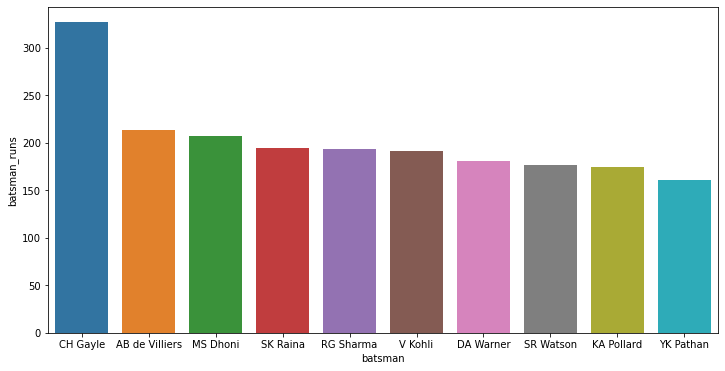

In [123]:
# let's see the visualization.
plt.figure(figsize=(12,6))
sns.barplot(data=df_deliveries,x=batsman_with_highsixes.index,y=batsman_with_highsixes)

# Who Is The Top Wicket Taker?

In [124]:
df_deliveries.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)

bowler
Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2602
SP Narine          2600
Name: player_dismissed, dtype: int64

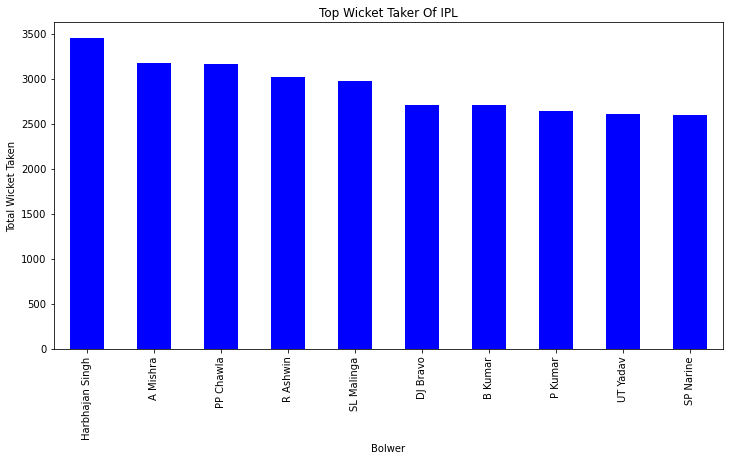

In [125]:
plt.figure(figsize=(12,6))
df_deliveries.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='blue')
plt.title('Top Wicket Taker Of IPL')
plt.xlabel('Bolwer')
plt.ylabel('Total Wicket Taken')
plt.show()

# Who Is The Batsman With Highest Runs?

In [126]:
df_deliveries.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10)

batsman
V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3775
G Gambhir     3524
RV Uthappa    3490
DA Warner     3398
MS Dhoni      3318
AM Rahane     3212
CH Gayle      3131
Name: batsman_runs, dtype: int64

So here in the above we can see that virat kohli scored the highest run in all total. Then in the 2nd Suresh Kumar raina scored the 2nd highest runs.

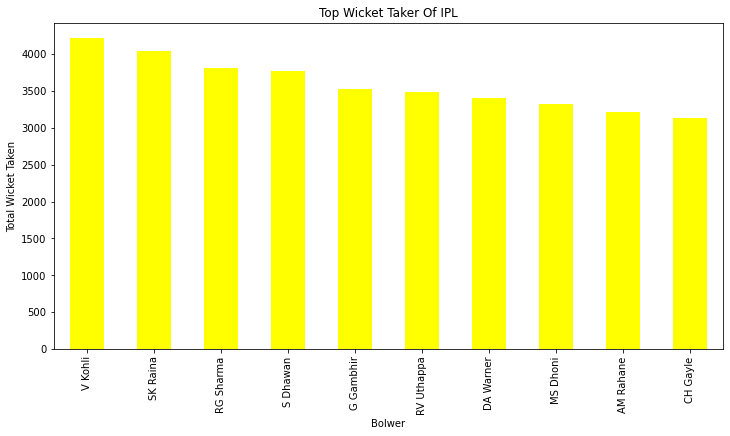

In [127]:
#let's see the plot.
plt.figure(figsize=(12,6))
df_deliveries.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10).plot(kind='bar',color='Yellow')
plt.title('Top Wicket Taker Of IPL')
plt.xlabel('Bolwer')
plt.ylabel('Total Wicket Taken')
plt.show()

# Types of dismissal_kind of players.

In [128]:
df_deliveries['dismissal_kind'].value_counts()

Not out                  170221
caught                     5348
bowled                     1581
run out                     852
lbw                         540
stumped                     278
caught and bowled           211
retired hurt                 12
hit wicket                   10
obstructing the field         2
Name: dismissal_kind, dtype: int64

# Who got out by caught maximum time?

In [130]:
caught_out = df_deliveries[df_deliveries['dismissal_kind']=='caught']
batsman_caughtout = caught_out.groupby('player_dismissed').count()['dismissal_kind'].sort_values(ascending=False).head(10)
batsman_caughtout

player_dismissed
SK Raina        112
RV Uthappa      108
RG Sharma       103
V Kohli          95
KD Karthik       85
Yuvraj Singh     84
G Gambhir        80
S Dhawan         79
YK Pathan        77
CH Gayle         75
Name: dismissal_kind, dtype: int64

<AxesSubplot:xlabel='player_dismissed', ylabel='dismissal_kind'>

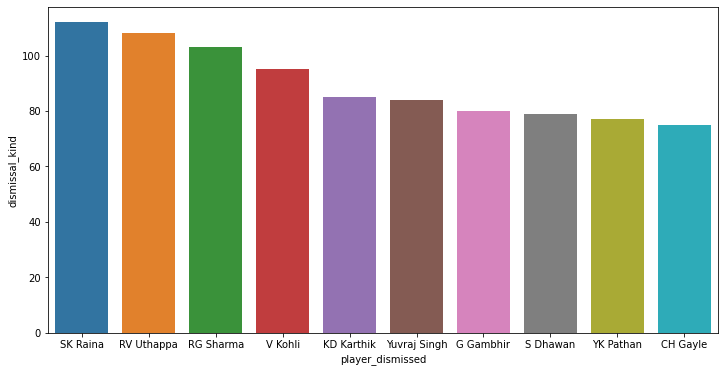

In [131]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_deliveries,x=batsman_caughtout.index,y=batsman_caughtout)

Suresh Raina caught out most of the time in the following graph. Then Robbin Uthapa and Rohit Sharma and Virat Kohli are occuring the position in the upper plot.

**Similarly let's check for other type of dismissal_kind.**

# Player Who got out by bowled maximum time?

player_dismissed
SR Watson     32
V Kohli       30
S Dhawan      28
G Gambhir     27
MK Pandey     24
DA Warner     23
RG Sharma     22
CH Gayle      22
PA Patel      22
KD Karthik    21
Name: dismissal_kind, dtype: int64


<AxesSubplot:xlabel='player_dismissed', ylabel='dismissal_kind'>

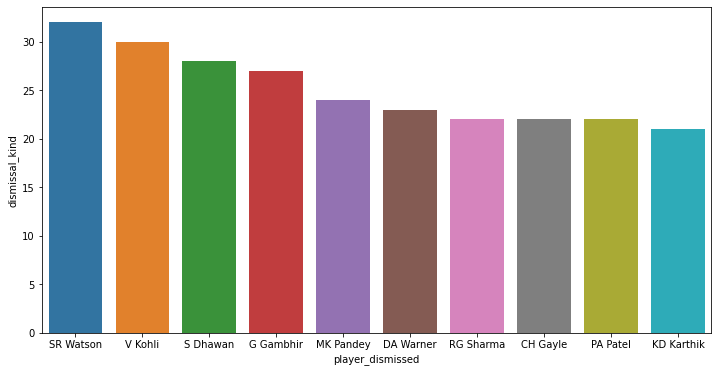

In [132]:
Bowled = df_deliveries[df_deliveries['dismissal_kind']=='bowled']
batsman_bowled = Bowled.groupby('player_dismissed').count()['dismissal_kind'].sort_values(ascending=False).head(10)
print(batsman_bowled)

plt.figure(figsize=(12,6))
sns.barplot(data=df_deliveries,x=batsman_bowled.index,y=batsman_bowled)

From the above we can see that Shane watson got bowled maximum times which is 32 times. Then Virat kohli got bowled 30 times and so on.

# Player Who got out by Runout maximum time?

player_dismissed
G Gambhir          16
S Dhawan           14
SK Raina           13
AT Rayudu          13
M Vijay            12
YK Pathan          11
Y Venugopal Rao    11
KD Karthik         11
A Mishra           10
PA Patel           10
Name: dismissal_kind, dtype: int64


<AxesSubplot:xlabel='player_dismissed', ylabel='dismissal_kind'>

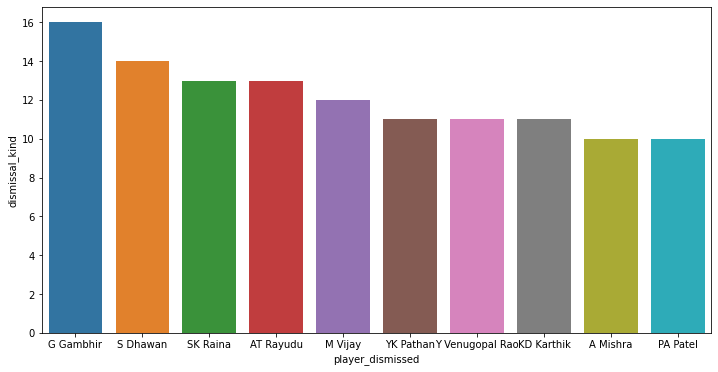

In [134]:
run_out = df_deliveries[df_deliveries['dismissal_kind']=='run out']
batsman_runout = run_out.groupby('player_dismissed').count()['dismissal_kind'].sort_values(ascending=False).head(10)
print(batsman_runout)

plt.figure(figsize=(12,6))
sns.barplot(data=df_deliveries,x=batsman_runout.index,y=batsman_runout)

Here in the above we can see that most of the time Gautam Gambhir runned out. Then sikhar dhawan and suresh kumar raina are following the 2nd and 3rd rank in runout table.

# Player Who got out by LBW maximum time?

player_dismissed
BB McCullum     16
RV Uthappa      13
PA Patel        12
DR Smith        12
AM Rahane       11
RG Sharma       11
KD Karthik      11
M Vijay          9
SR Tendulkar     8
S Dhawan         8
Name: dismissal_kind, dtype: int64


<AxesSubplot:xlabel='player_dismissed', ylabel='dismissal_kind'>

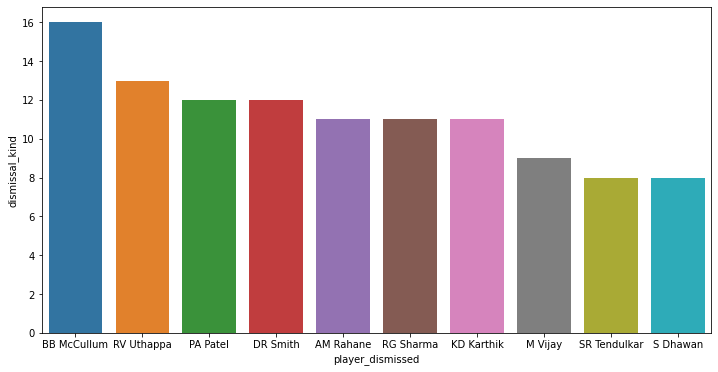

In [135]:
lbw = df_deliveries[df_deliveries['dismissal_kind']=='lbw']
batsman_lbw = lbw.groupby('player_dismissed').count()['dismissal_kind'].sort_values(ascending=False).head(10)
print(batsman_lbw)

plt.figure(figsize=(12,6))
sns.barplot(data=df_deliveries,x=batsman_lbw.index,y=batsman_lbw)

In the above we can notice that Brendon McCullum is the one who got out by LBW maximum time. Similarly Robbin Uthapa is in the 2nd in list.

# Who Got Stumped Out Maximum times ?

player_dismissed
SK Raina          8
RV Uthappa        7
AT Rayudu         7
F du Plessis      6
AB de Villiers    6
PA Patel          6
S Dhawan          5
DA Warner         5
M Vijay           5
Mandeep Singh     4
Name: dismissal_kind, dtype: int64


<AxesSubplot:xlabel='player_dismissed', ylabel='dismissal_kind'>

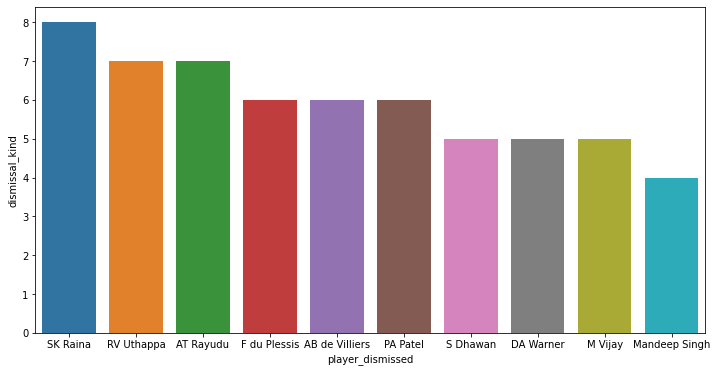

In [136]:
stumped = df_deliveries[df_deliveries['dismissal_kind']=='stumped']
batsman_stumped = stumped.groupby('player_dismissed').count()['dismissal_kind'].sort_values(ascending=False).head(10)
print(batsman_stumped)

plt.figure(figsize=(12,6))
sns.barplot(data=df_deliveries,x=batsman_stumped.index,y=batsman_stumped)

Suresh Kumar Raina got stumped out 8 times. Robin Uthapa and Ambati Raydu got stumped out 7 times each. Similarly Faf Du Plesis, Ab de villiers and Parthiv Patel got stumped out 6times each. Sikhar Dhawan, David Warner, Murli Vijay got stumpped out 5times each. Mandeep singh got stumped out 4 times.


These are the top 10 players names who got out by stumped.

# Who Got Caught And Bowled Maximum times ?

player_dismissed
SK Raina         7
RG Sharma        6
AM Rahane        5
RA Jadeja        5
R Dravid         5
AT Rayudu        5
G Gambhir        4
KC Sangakkara    4
MS Dhoni         4
M Vohra          4
Name: dismissal_kind, dtype: int64


<AxesSubplot:xlabel='player_dismissed', ylabel='dismissal_kind'>

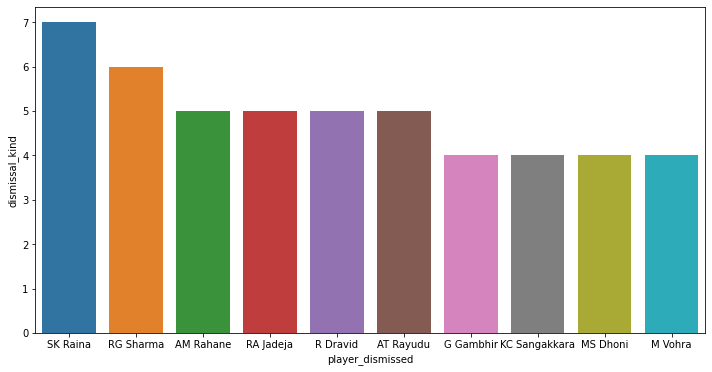

In [137]:
caught_and_bowled = df_deliveries[df_deliveries['dismissal_kind']=='caught and bowled']
batsman_caught_and_bowled = caught_and_bowled.groupby('player_dismissed').count()['dismissal_kind'].sort_values(ascending=False).head(10)
print(batsman_caught_and_bowled)

plt.figure(figsize=(12,6))
sns.barplot(data=df_deliveries,x=batsman_caught_and_bowled.index,y=batsman_caught_and_bowled)

Suresh Kumar Raina got caught & bowled maximum times.

# Who Took retired hurt Maximum times ?

player_dismissed
Harbhajan Singh    2
SR Tendulkar       2
AJ Finch           1
DJ Thornely        1
JJ Bumrah          1
KH Pandya          1
KP Pietersen       1
N Rana             1
S Dhawan           1
VVS Laxman         1
Name: dismissal_kind, dtype: int64


<AxesSubplot:xlabel='player_dismissed', ylabel='dismissal_kind'>

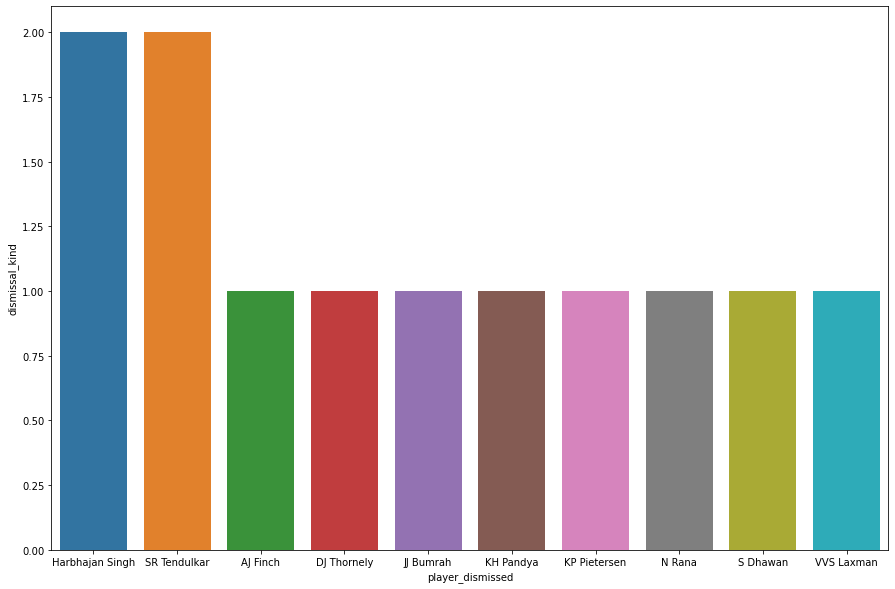

In [138]:
retired_hurt = df_deliveries[df_deliveries['dismissal_kind']=='retired hurt']
batsman_retired_hurt = retired_hurt.groupby('player_dismissed').count()['dismissal_kind'].sort_values(ascending=False).head(10)
print(batsman_retired_hurt)

plt.figure(figsize=(15,10))
sns.barplot(data=df_deliveries,x=batsman_retired_hurt.index,y=batsman_retired_hurt)

Harbhajan Singh and Sachin Tendulkar Took 2 times retired hurt which is the maximum number in the list.

# Who Got Out By Hit Wicket Maximum times ?

player_dismissed
DA Warner        1
DJ Hooda         1
MA Khote         1
Misbah-ul-Haq    1
R Parag          1
RA Jadeja        1
SA Asnodkar      1
SP Jackson       1
SS Tiwary        1
Yuvraj Singh     1
Name: dismissal_kind, dtype: int64


<AxesSubplot:xlabel='player_dismissed', ylabel='dismissal_kind'>

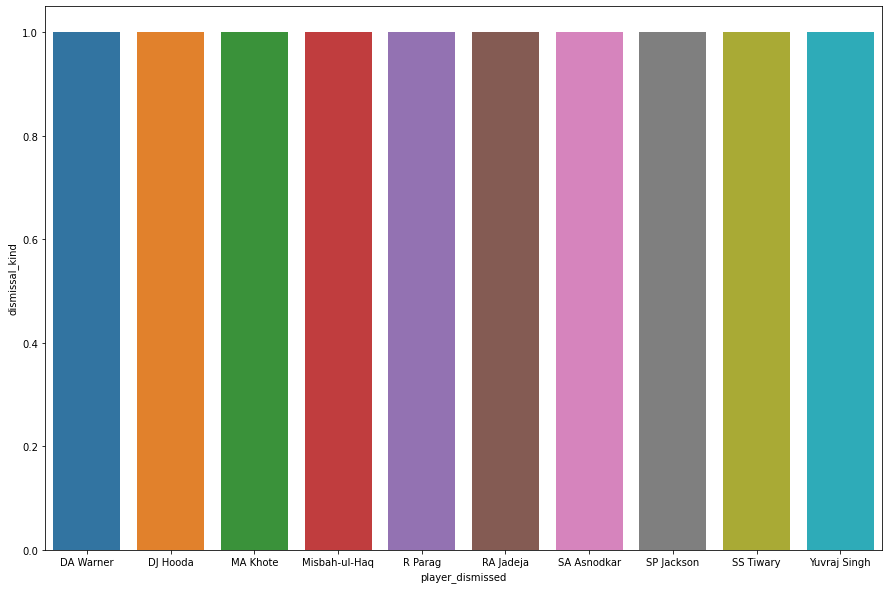

In [139]:
hit_wicket = df_deliveries[df_deliveries['dismissal_kind']=='hit wicket']
batsman_hit_wicket = hit_wicket.groupby('player_dismissed').count()['dismissal_kind'].sort_values(ascending=False)
print(batsman_hit_wicket)

plt.figure(figsize=(15,10))
sns.barplot(data=df_deliveries,x=batsman_hit_wicket.index,y=batsman_hit_wicket)

Here we can see that there are 10 players who got out by Hit Wicket. They are David Warner, Deepak Hooda, Musavir Asmat Khote, Misbah ul haq, R parag, Ravindra Jadeja, Sa Asnodkar, Jackson, Tiwary, Yuvraj Singh.

# Who Got Out By Obstructing The Field Maximum times ?

player_dismissed
A Mishra     1
YK Pathan    1
Name: dismissal_kind, dtype: int64


<AxesSubplot:xlabel='player_dismissed', ylabel='dismissal_kind'>

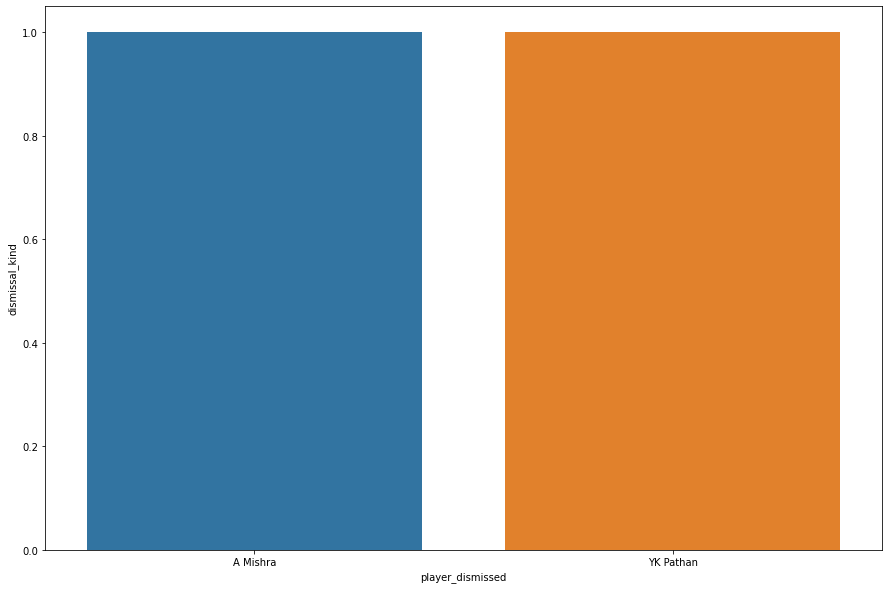

In [132]:
obstructing_the_field = df_deliveries[df_deliveries['dismissal_kind']=='obstructing the field']
batsman_obstructing_the_field = obstructing_the_field.groupby('player_dismissed').count()['dismissal_kind'].sort_values(ascending=False)
print(batsman_obstructing_the_field)

plt.figure(figsize=(15,10))
sns.barplot(data=df_deliveries,x=batsman_obstructing_the_field.index,y=batsman_obstructing_the_field)

Here we can notice that there are only two players who got dismissed by obstructing the field , they are Amit Mishra and Yusuf Pathan. They both got dismissed only one time each.

In [140]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

# Identifying The Bowlers Who Gave Maximum And Minimum Number Of Runs To Batsman.

In [141]:
df_deliveries['bowler'].unique()

array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
       'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
       'AB Dinda', 'DL Chahar', 'BA Stokes', 'Imran Tahir', 'A Zampa',
       'R Bhatia', 'TG Southee', 'HH Pandya', 'MJ McClenaghan',
       'JJ Bumrah', 'KH Pandya', 'KA Pollard', 'TA Boult', 'PP Chawla',
       'SP Narine', 'CR Woakes', 'Kuldeep Yadav', 'YK Pathan', 'P Kumar',
       'DS Kulkarni', 'MS Gony', 'S Kaushik', 'DR Smith', 'SB Jakati',
       'Sandeep Sharma', 'MM Sharma', 'AR Patel', 'T Natarajan',
       'MP Stoinis', 'Swapnil Singh', 'DT Christian', 'RD Chahar',
       'Z Khan', 'CH Morris', 'PJ Cummins', 'S Nadeem', 'A Mishra',
       'CR Brathwaite', 'B Stanlake', 'Iqbal Abdulla', 'P Negi',
       'SK Raina', 'Tejas Baroka', 'Basil Thampi', 'SL Malinga',
       'Harbhajan Singh', 'AS Rajpoot', 'VR Aaron', 'CJ Anderson',
       'Mustafizur Rahman', 'UT Yadav', 'C d

In [142]:
df_deliveries['bowler'].nunique()

405

# Top 10 Bowlers Who Gave Maximum Number Of Runs:

bowler
PP Chawla          4153
Harbhajan Singh    4050
A Mishra           3850
DJ Bravo           3733
UT Yadav           3634
SL Malinga         3511
R Ashwin           3391
P Kumar            3342
B Kumar            3264
RA Jadeja          3218
Name: total_runs, dtype: int64


<AxesSubplot:xlabel='bowler', ylabel='total_runs'>

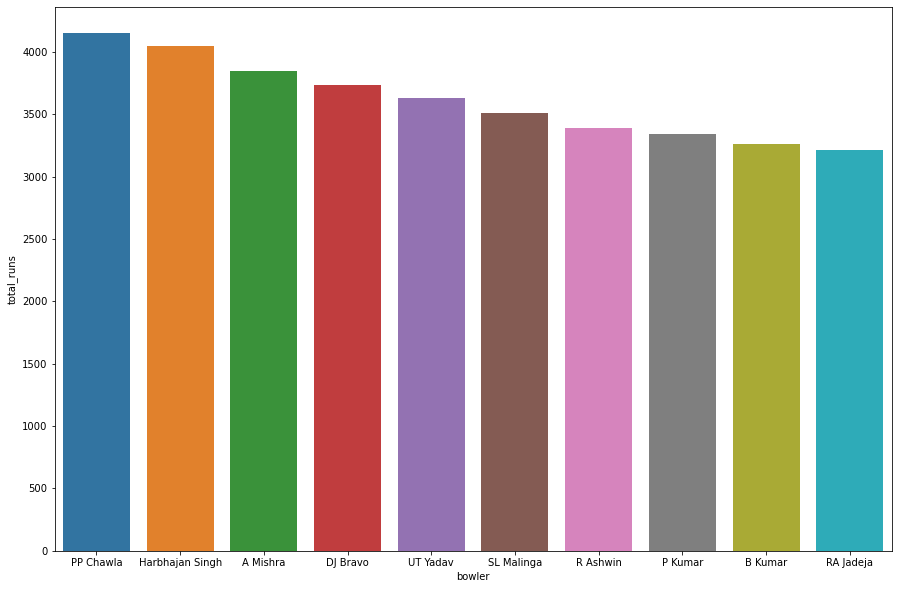

In [143]:
b = df_deliveries.groupby('bowler')['total_runs'].sum().sort_values(ascending=False).head(10)
print(b)

plt.figure(figsize=(15,10))
sns.barplot(data=df_deliveries,x=b.index,y=b)

So Here we can see that there are top 10 bowlers who gave maximum number of runs to the opponents and in the list pp Chawla is the one who gave 4153 runs. Then in the second Harbhajan Singh, then Amit Mishra, then bravo, yadav,malinga,ashwin,p kumar,b kumar, and jadeja are there in the top of the list.

# Bottom 10 Players Who Gave Minimum Number Of Runs To Batsmans:

bowler
AC Gilchrist        0
AM Rahane           5
SPD Smith           5
SS Mundhe           6
LA Carseldine       6
SN Khan             6
Y Gnaneswara Rao    7
KS Williamson       7
SA Yadav            8
RS Gavaskar         8
Name: total_runs, dtype: int64


<AxesSubplot:xlabel='bowler', ylabel='total_runs'>

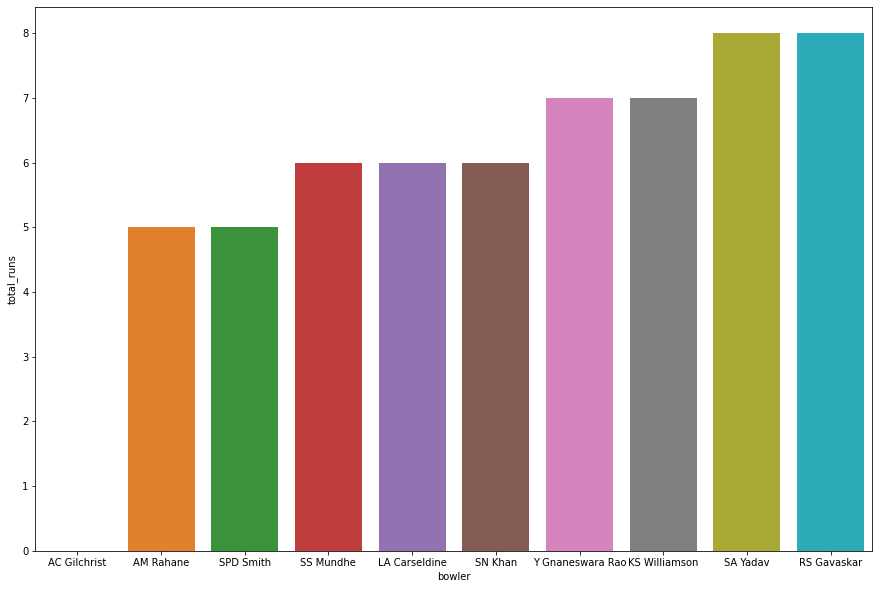

In [145]:
c = df_deliveries.groupby('bowler')['total_runs'].sum().sort_values(ascending=True).head(10)
print(c)

plt.figure(figsize=(15,10))
sns.barplot(data=df_deliveries,x=c.index,y=c)

Similarly they are the bottom 10 players who gave less runs. Infact there is a player who didn't give a sigle run to the batsmans, all balls went dott. He is Adam Gilchrist.

Then we have Ajinkya Rahane and steven smith who gave only 5 runs each and so on.

# Let's Gather Some Information On The Fielders:

In [146]:
df_deliveries['dismissal_kind'].unique()

array(['Not out', 'caught', 'bowled', 'run out', 'lbw',
       'caught and bowled', 'stumped', 'retired hurt', 'hit wicket',
       'obstructing the field'], dtype=object)

# Top 10 Fielders Who Caught Maximum Balls.

fielder
KD Karthik        109
SK Raina           99
MS Dhoni           98
AB de Villiers     93
RV Uthappa         84
RG Sharma          82
KA Pollard         76
V Kohli            73
PA Patel           69
S Dhawan           68
Name: dismissal_kind, dtype: int64


<AxesSubplot:xlabel='fielder', ylabel='dismissal_kind'>

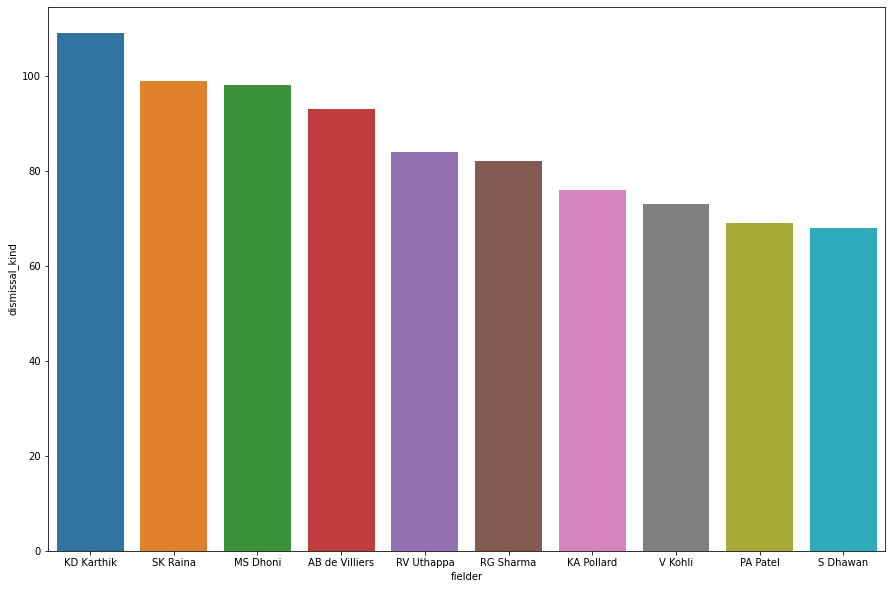

In [148]:
caught = df_deliveries[df_deliveries['dismissal_kind']=='caught']
batsman_caught = caught.groupby('fielder').count()['dismissal_kind'].sort_values(ascending=False).head(10)
print(batsman_caught)

plt.figure(figsize=(15,10))
sns.barplot(data=df_deliveries,x=batsman_caught.index,y=batsman_caught)

Krishnakumar Dinesh Karthik is the one fielder who took 109 catches. After him Suresh Raina and Mahendra Singh Dhoni are holding the 2nd and 3rd position in this plot having 99 and 98 number of catches respectively.

# Top 10 Fielders Who Did Maximum Number of Runouts:

fielder
MS Dhoni          23
RA Jadeja         20
V Kohli           17
SK Raina          16
KD Karthik        14
AB de Villiers    14
MK Pandey         14
PA Patel          12
DJ Bravo          12
YK Pathan         10
Name: dismissal_kind, dtype: int64


<AxesSubplot:xlabel='fielder', ylabel='dismissal_kind'>

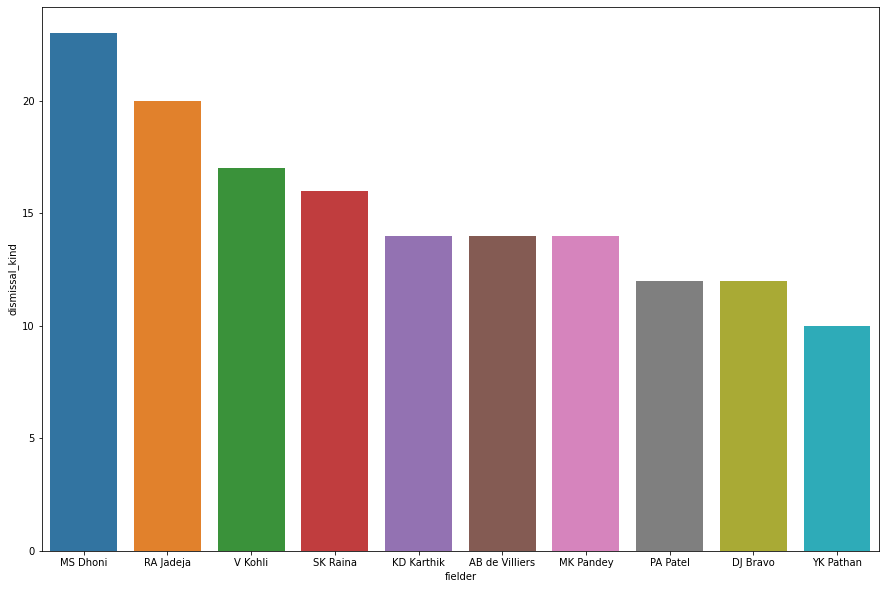

In [150]:
run_out = df_deliveries[df_deliveries['dismissal_kind']=='run out']
batsman_run_out = run_out.groupby('fielder').count()['dismissal_kind'].sort_values(ascending=False).head(10)
print(batsman_run_out)

plt.figure(figsize=(15,10))
sns.barplot(data=df_deliveries,x=batsman_run_out.index,y=batsman_run_out)

So Here from this plot we can clearly see that Mahendra Singh Dhoni took the 1st position by doing maximum run outs. He did 23 runouts between those couple of years. Then in the 2nd position Ravindra Jadeja and in the 3rd position Virat Kohli is there. they did 20 and 17 runouts respectively.

# Top 10 Players Who Did Maximum Number Of Stumped Out:

fielder
MS Dhoni         38
RV Uthappa       32
KD Karthik       29
WP Saha          18
AC Gilchrist     16
PA Patel         16
NV Ojha          10
KC Sangakkara     9
RR Pant           9
Q de Kock         8
Name: dismissal_kind, dtype: int64


<AxesSubplot:xlabel='fielder', ylabel='dismissal_kind'>

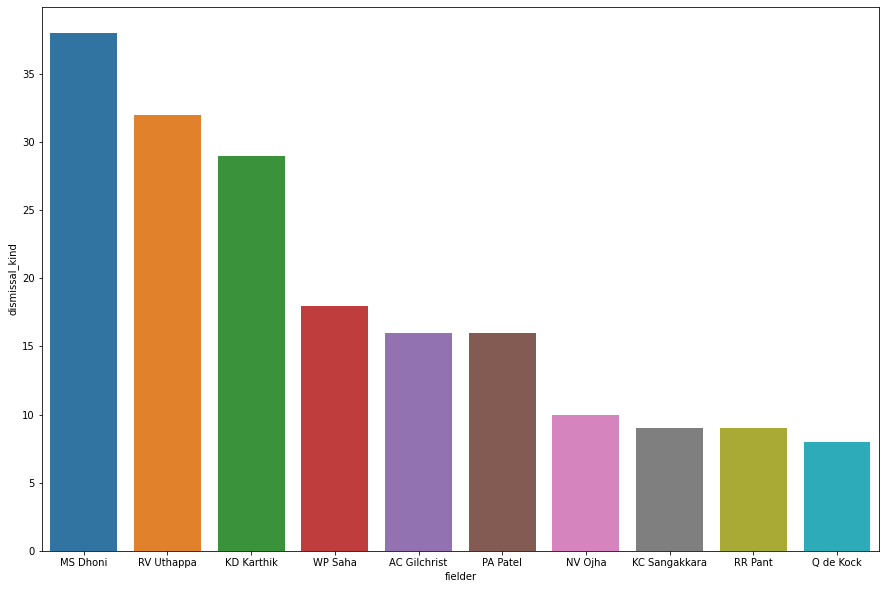

In [152]:
stumped_out = df_deliveries[df_deliveries['dismissal_kind']=='stumped']
batsman_stumped_out = stumped_out.groupby('fielder').count()['dismissal_kind'].sort_values(ascending=False).head(10)
print(batsman_stumped_out)

plt.figure(figsize=(15,10))
sns.barplot(data=df_deliveries,x=batsman_stumped_out.index,y=batsman_stumped_out)

In this field also Dhoni took the 1st position of doing stumped out and he did almost 38 stumped out.

Then in the 2nd position Uthappa did 32 stumped out.

Then in the 3rd Dinesh Karthik did 29 stumped out.